In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CO2_Emissions_Canada.csv')
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
data.shape

(7385, 12)

In [5]:
data.duplicated().sum()

1103

In [6]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [7]:
data.shape

(6282, 12)

In [8]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [9]:
data['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [10]:
data['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [11]:
data['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16], dtype=int64)

In [12]:
data['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [13]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [14]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

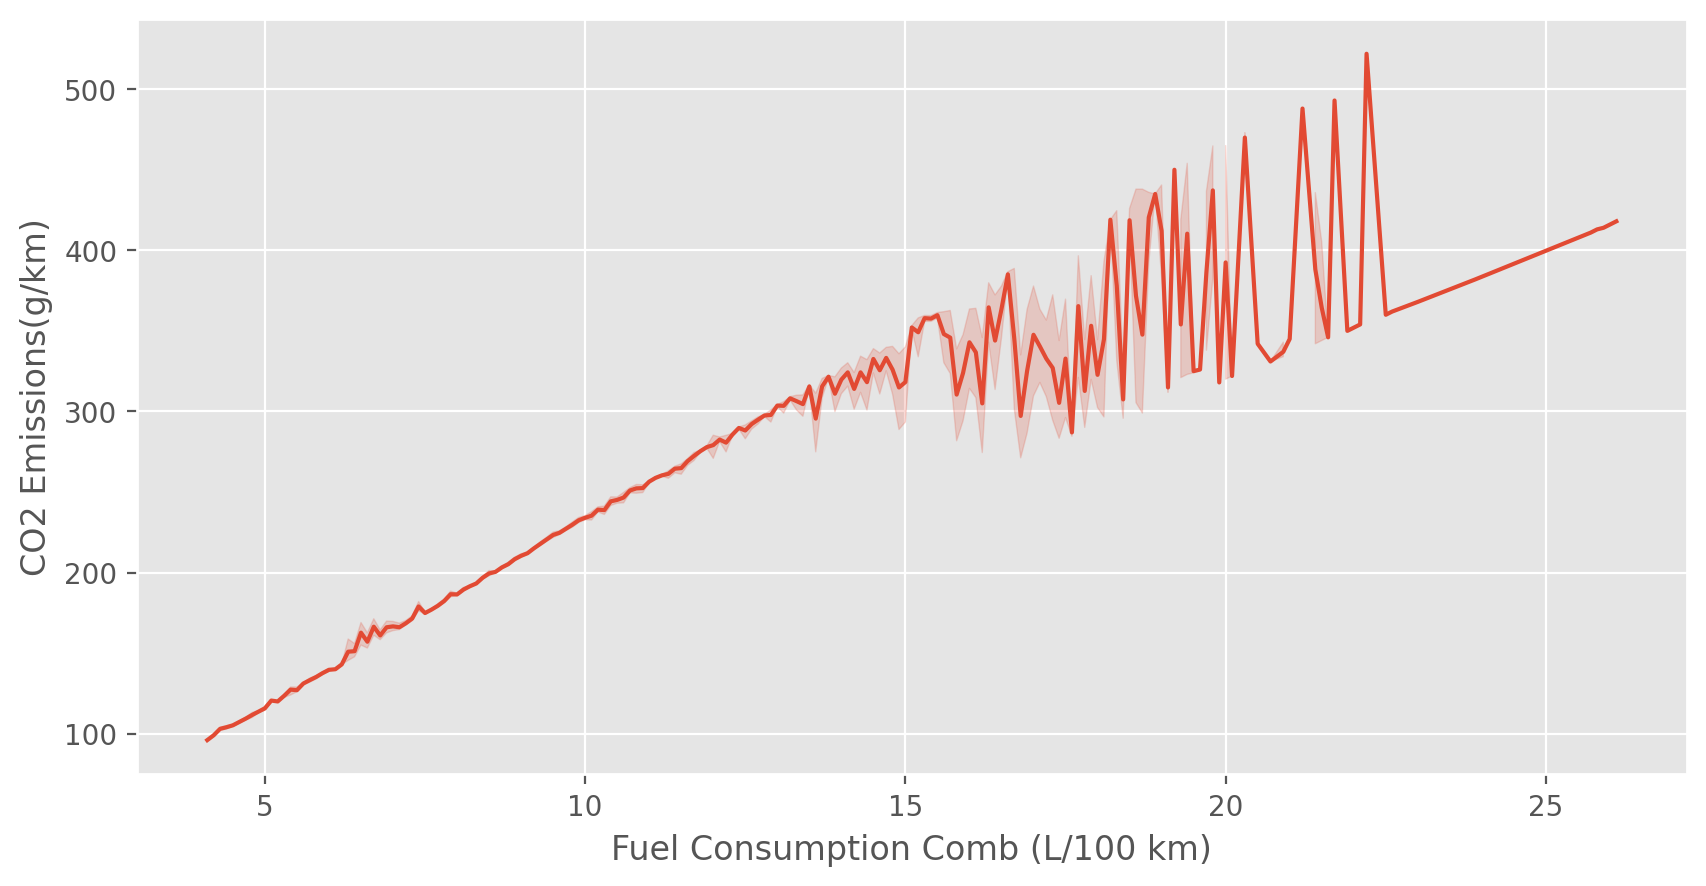

In [15]:
plt.figure(figsize = (10,5), dpi = 200)
sns.lineplot('Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

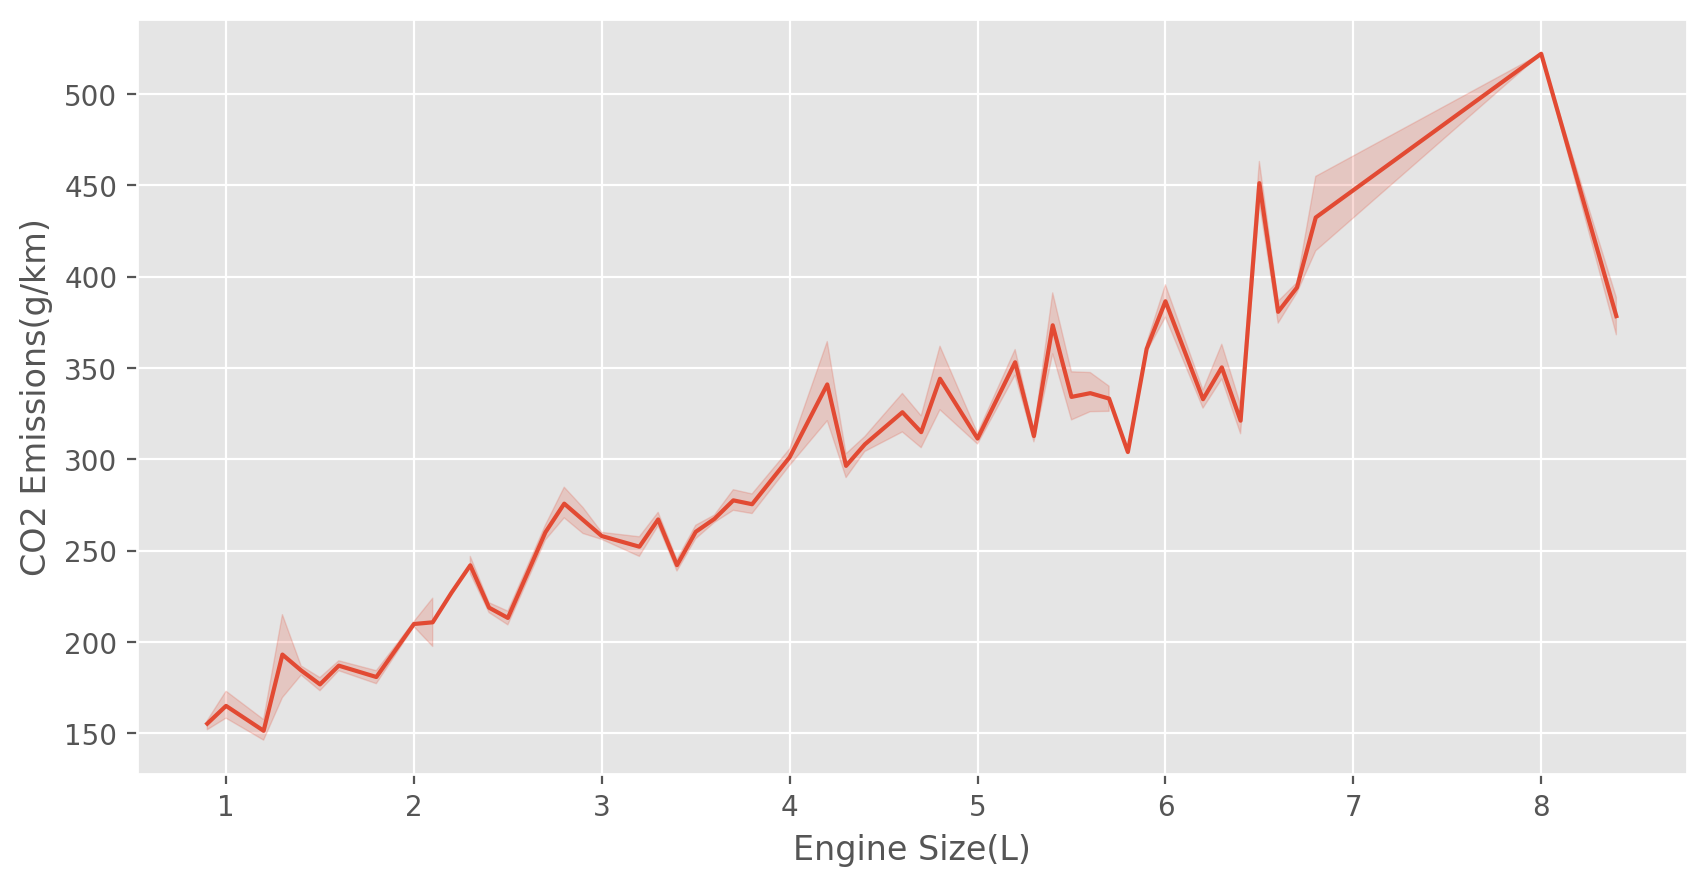

In [16]:
plt.figure(figsize = (10,5), dpi = 200)
sns.lineplot('Engine Size(L)', 'CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption Comb (L/100 km)'>

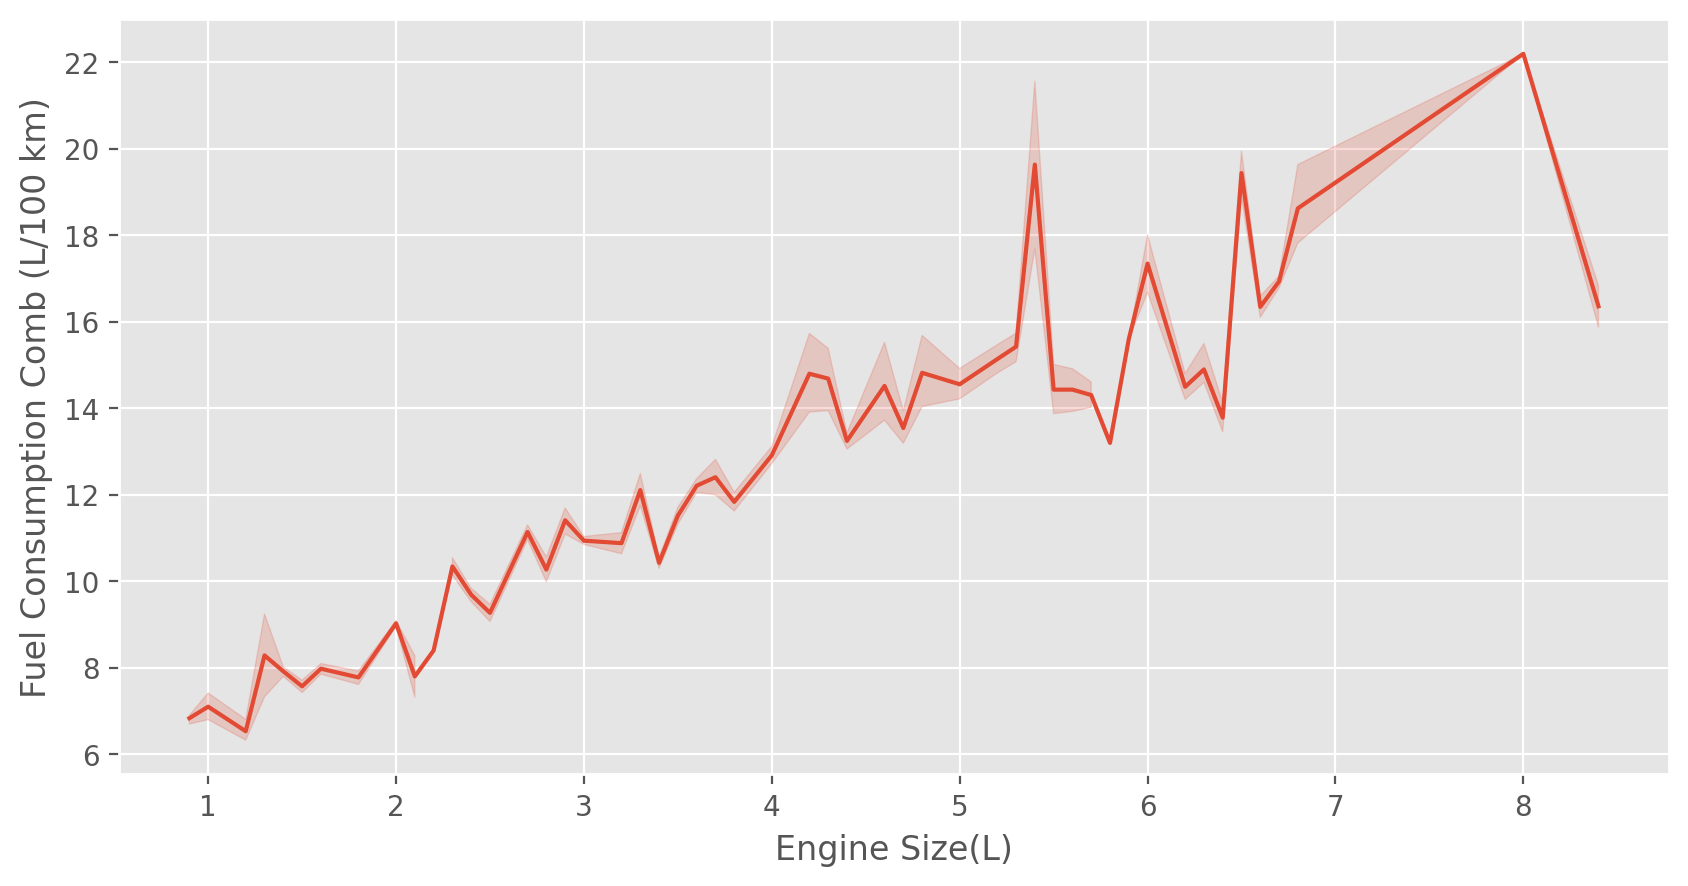

In [17]:
plt.figure(figsize = (10,5), dpi = 200)
sns.lineplot('Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', data = data)

<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

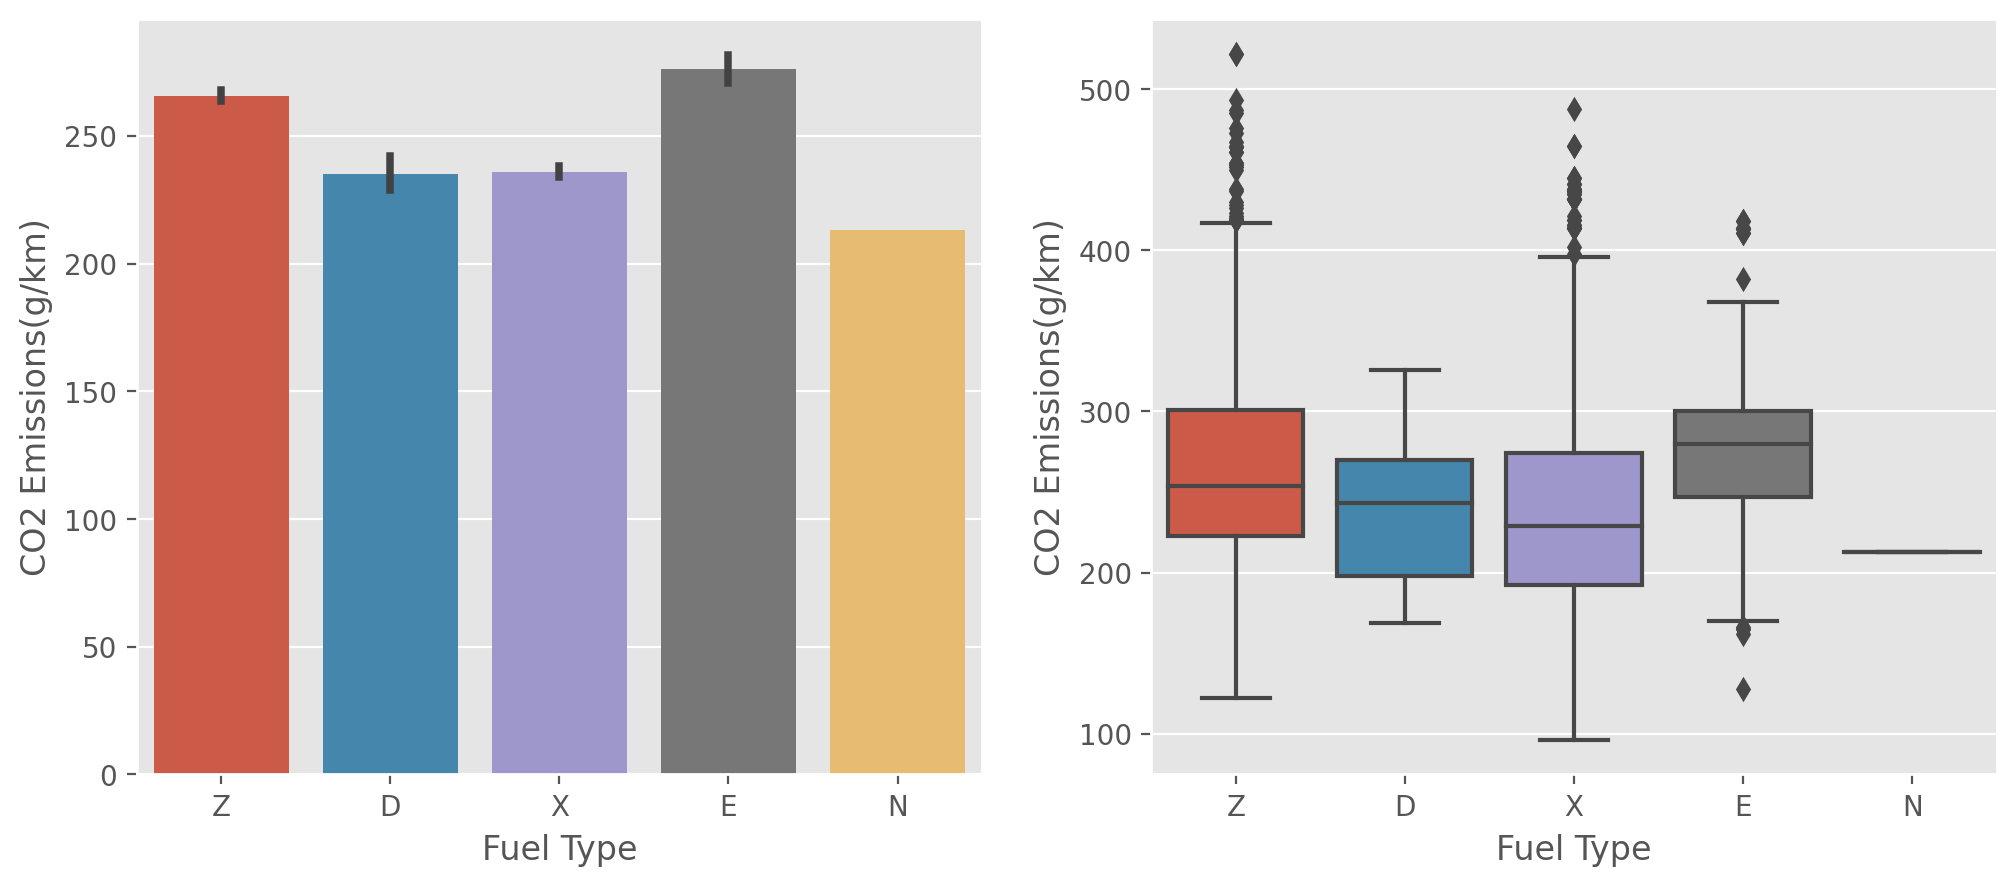

In [18]:
plt.figure(figsize = (12,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Fuel Type','CO2 Emissions(g/km)', data = data)

plt.subplot(1,2,2)
sns.boxplot('Fuel Type','CO2 Emissions(g/km)', data = data)

<AxesSubplot:xlabel='Fuel Type', ylabel='Fuel Consumption Comb (L/100 km)'>

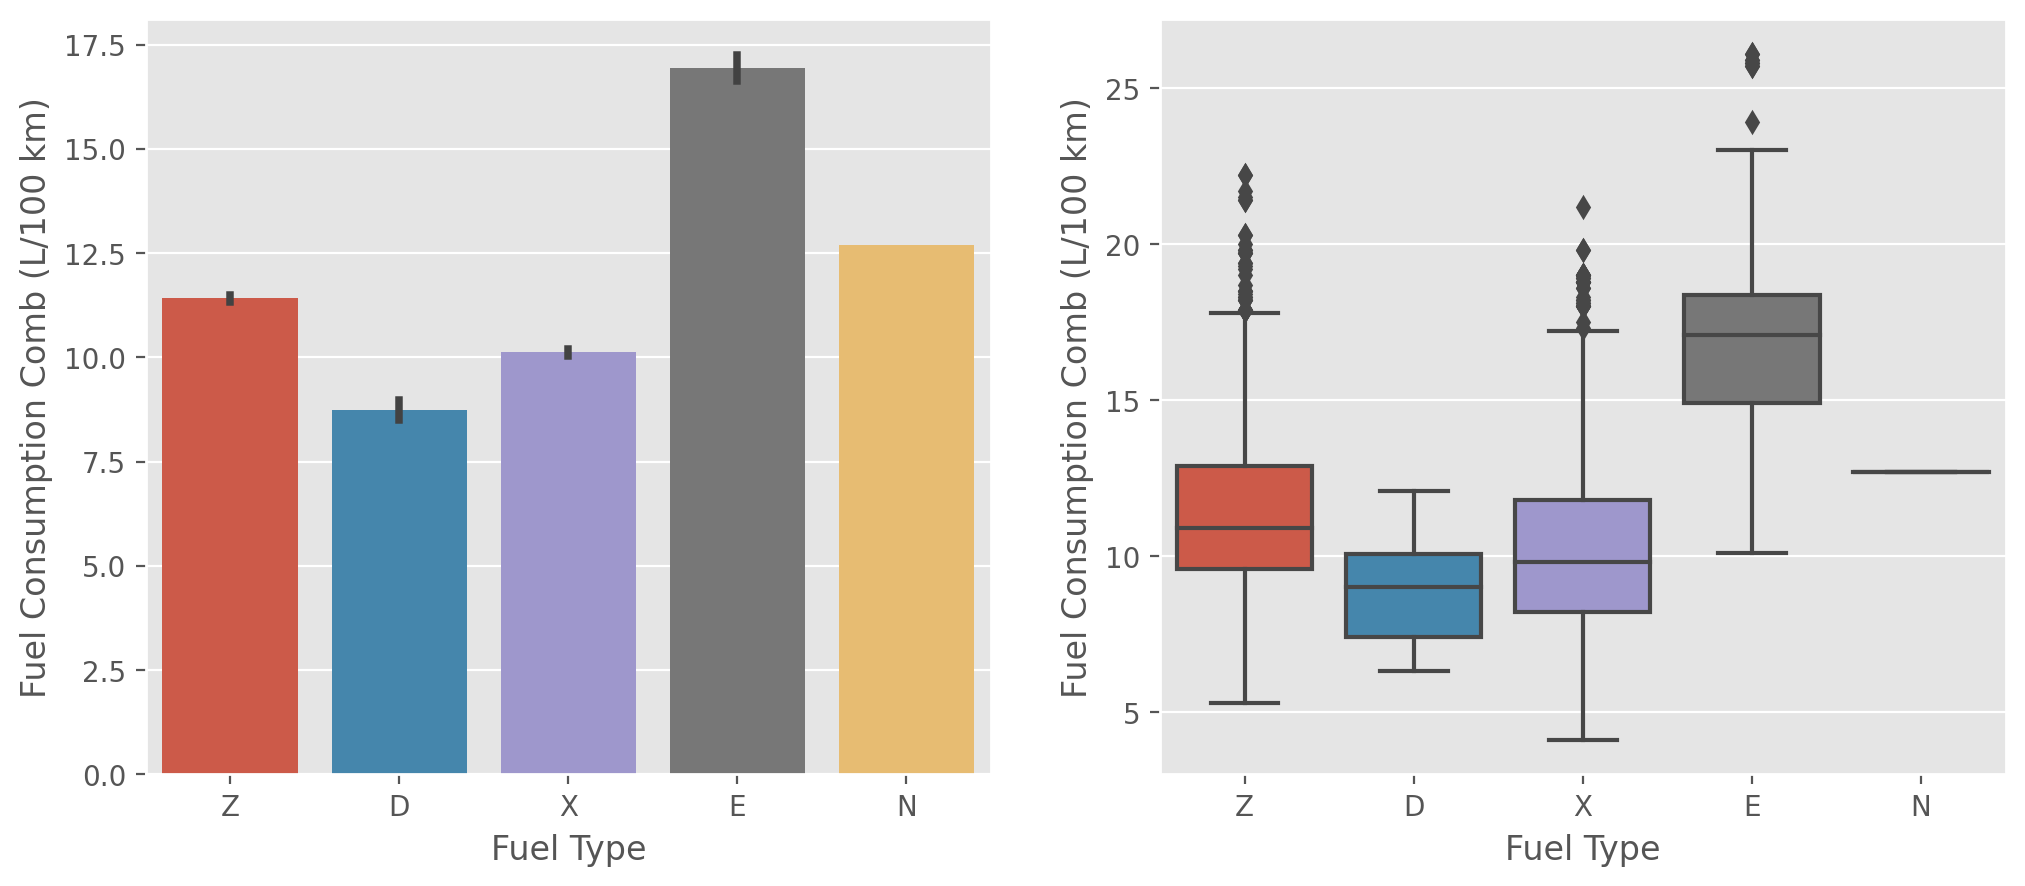

In [19]:
plt.figure(figsize = (12,5), dpi = 200)

plt.subplot(1,2,1)
sns.barplot('Fuel Type','Fuel Consumption Comb (L/100 km)', data = data)

plt.subplot(1,2,2)
sns.boxplot('Fuel Type','Fuel Consumption Comb (L/100 km)', data = data)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

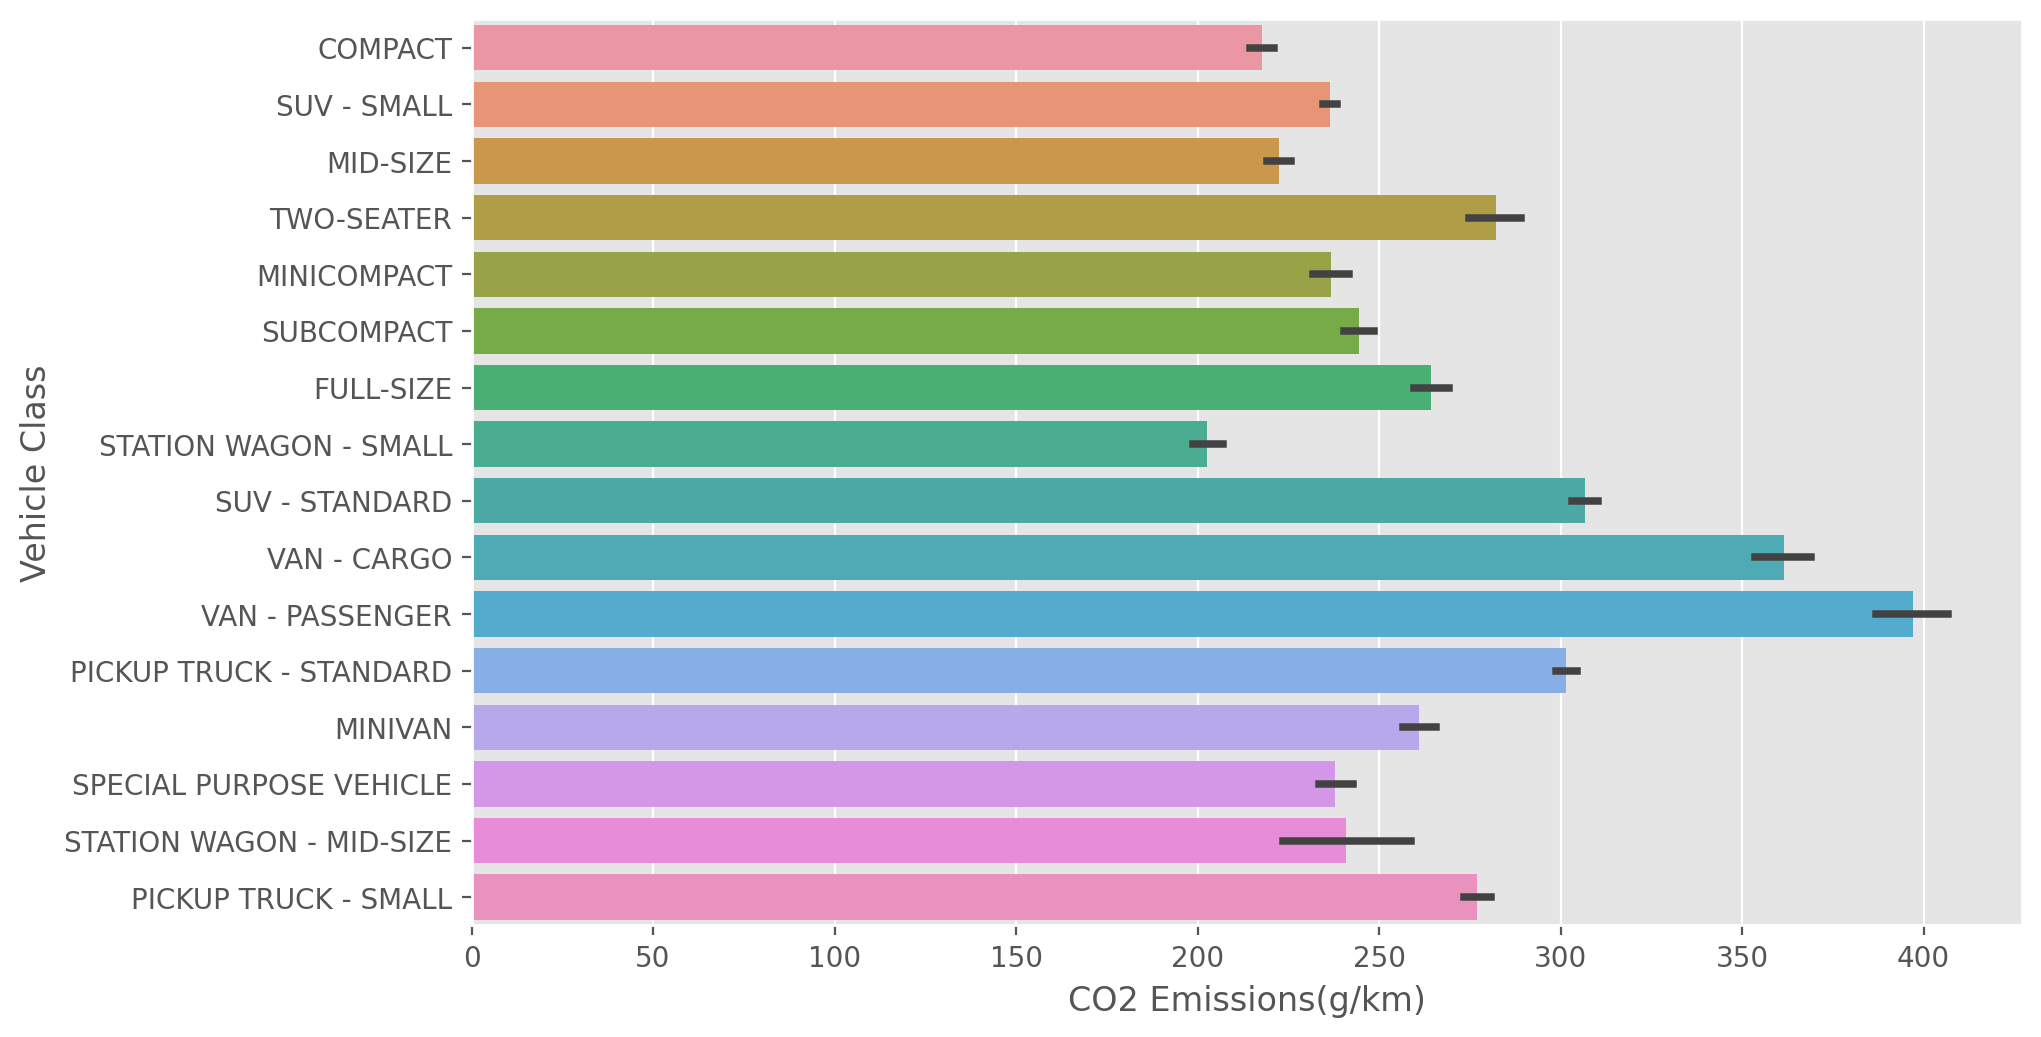

In [20]:
plt.figure(figsize = (10,6), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Vehicle Class', data = data)

In [21]:
data.groupby(['Vehicle Class']).mean().sort_values('CO2 Emissions(g/km)', ascending = False).index

Index(['VAN - PASSENGER', 'VAN - CARGO', 'SUV - STANDARD',
       'PICKUP TRUCK - STANDARD', 'TWO-SEATER', 'PICKUP TRUCK - SMALL',
       'FULL-SIZE', 'MINIVAN', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'SPECIAL PURPOSE VEHICLE', 'MINICOMPACT', 'SUV - SMALL', 'MID-SIZE',
       'COMPACT', 'STATION WAGON - SMALL'],
      dtype='object', name='Vehicle Class')

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

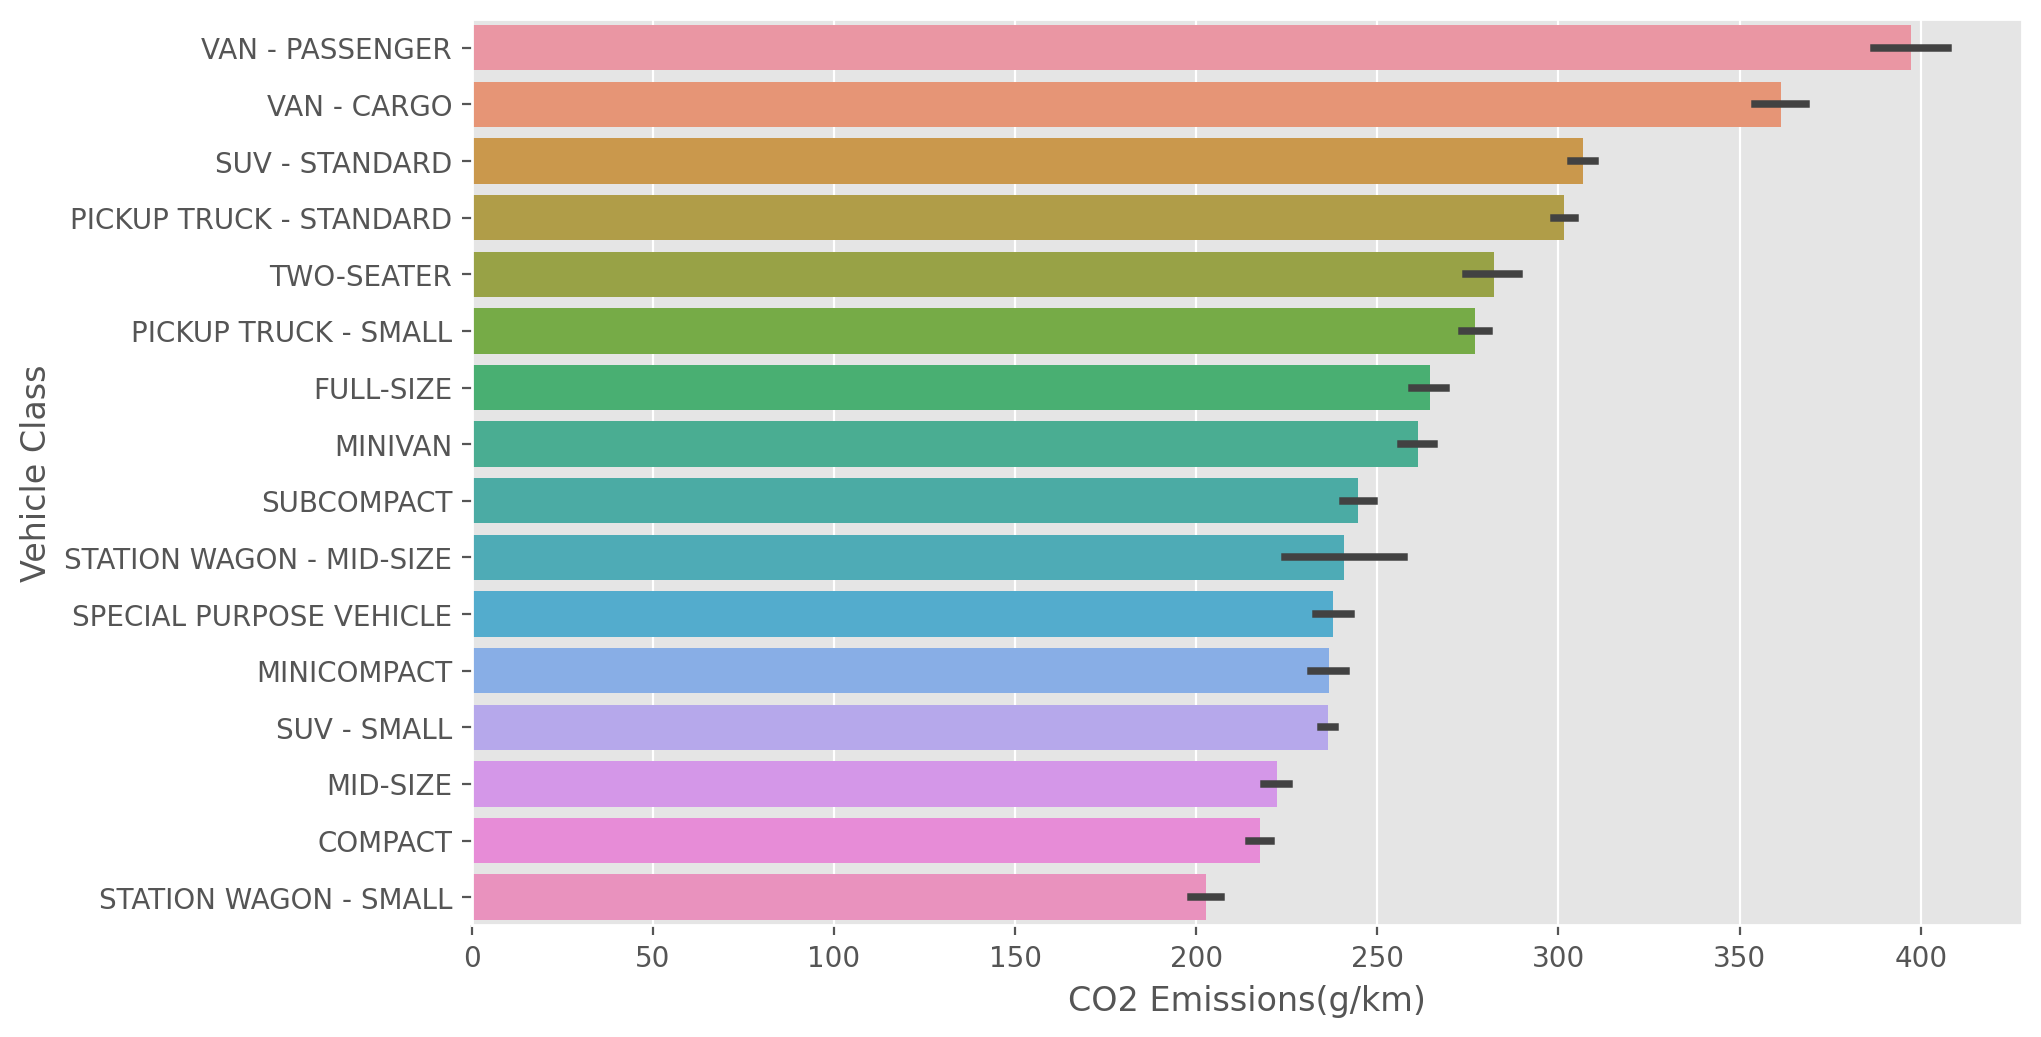

In [22]:
desc_order = data.groupby(['Vehicle Class']).mean().sort_values('CO2 Emissions(g/km)', ascending = False).index
plt.figure(figsize = (10,6), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Vehicle Class', data = data, order = desc_order)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

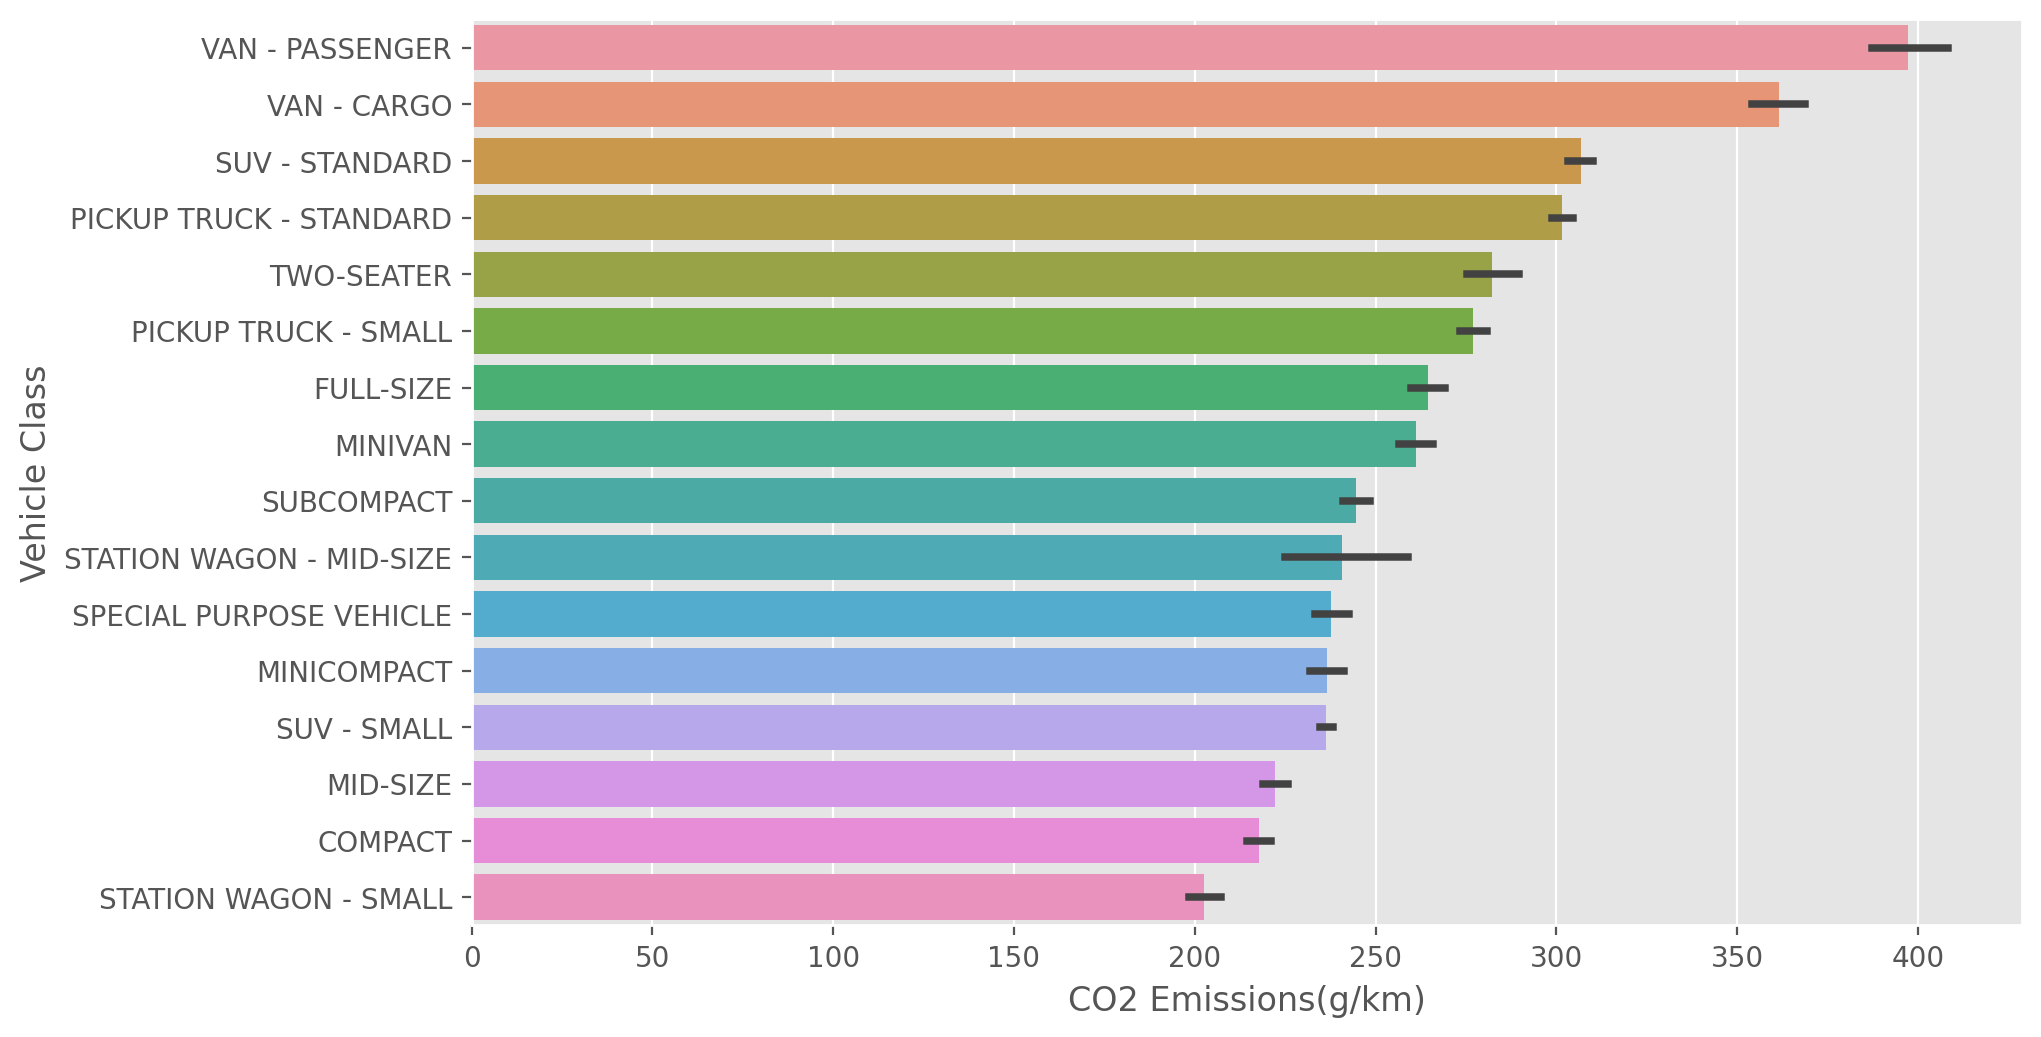

In [23]:
desc_order = data.groupby(['Vehicle Class']).mean().sort_values('CO2 Emissions(g/km)', ascending = False).index
plt.figure(figsize = (10,6), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Vehicle Class', data = data, order = desc_order)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Vehicle Class'>

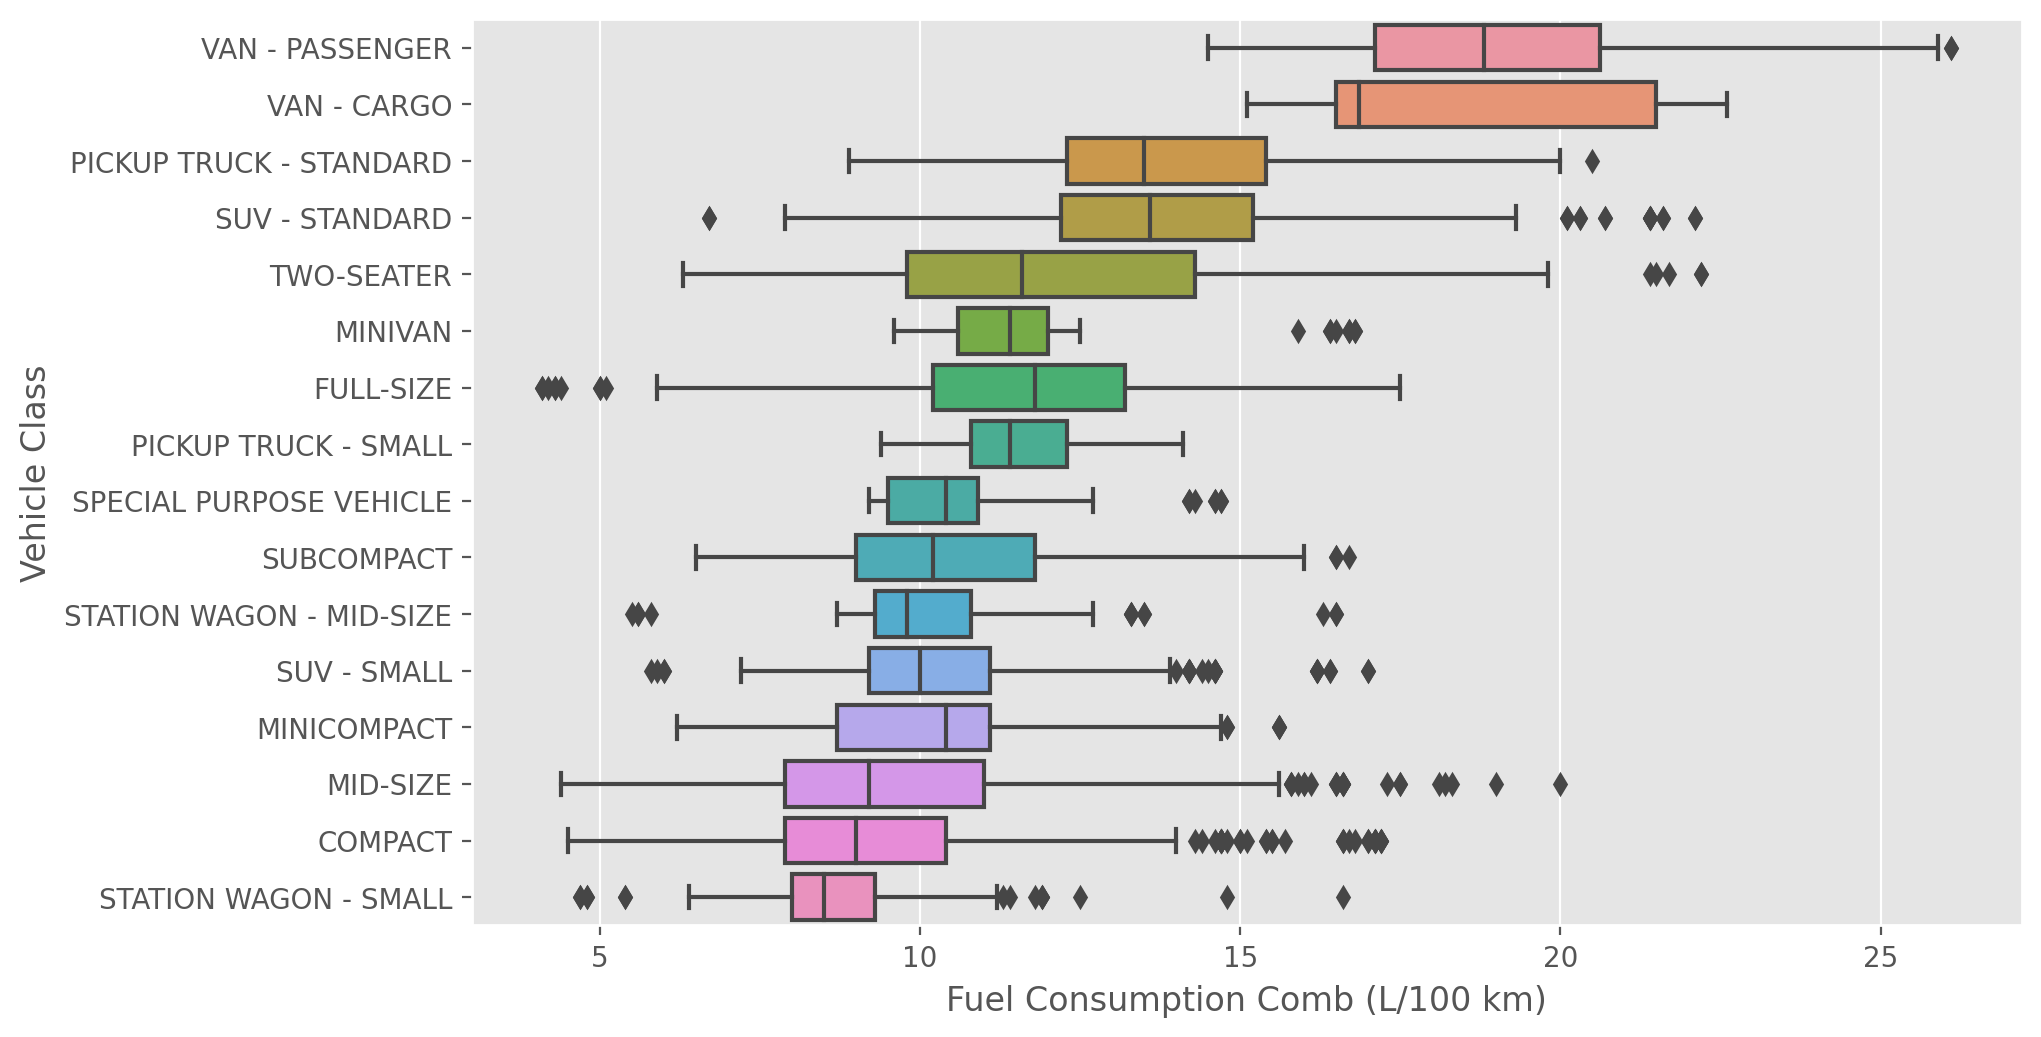

In [24]:
desc_order = data.groupby(['Vehicle Class']).mean().sort_values('Fuel Consumption Comb (L/100 km)', ascending = False).index
plt.figure(figsize = (10,6), dpi = 200)
sns.boxplot('Fuel Consumption Comb (L/100 km)', 'Vehicle Class', data = data, order = desc_order)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Make'>

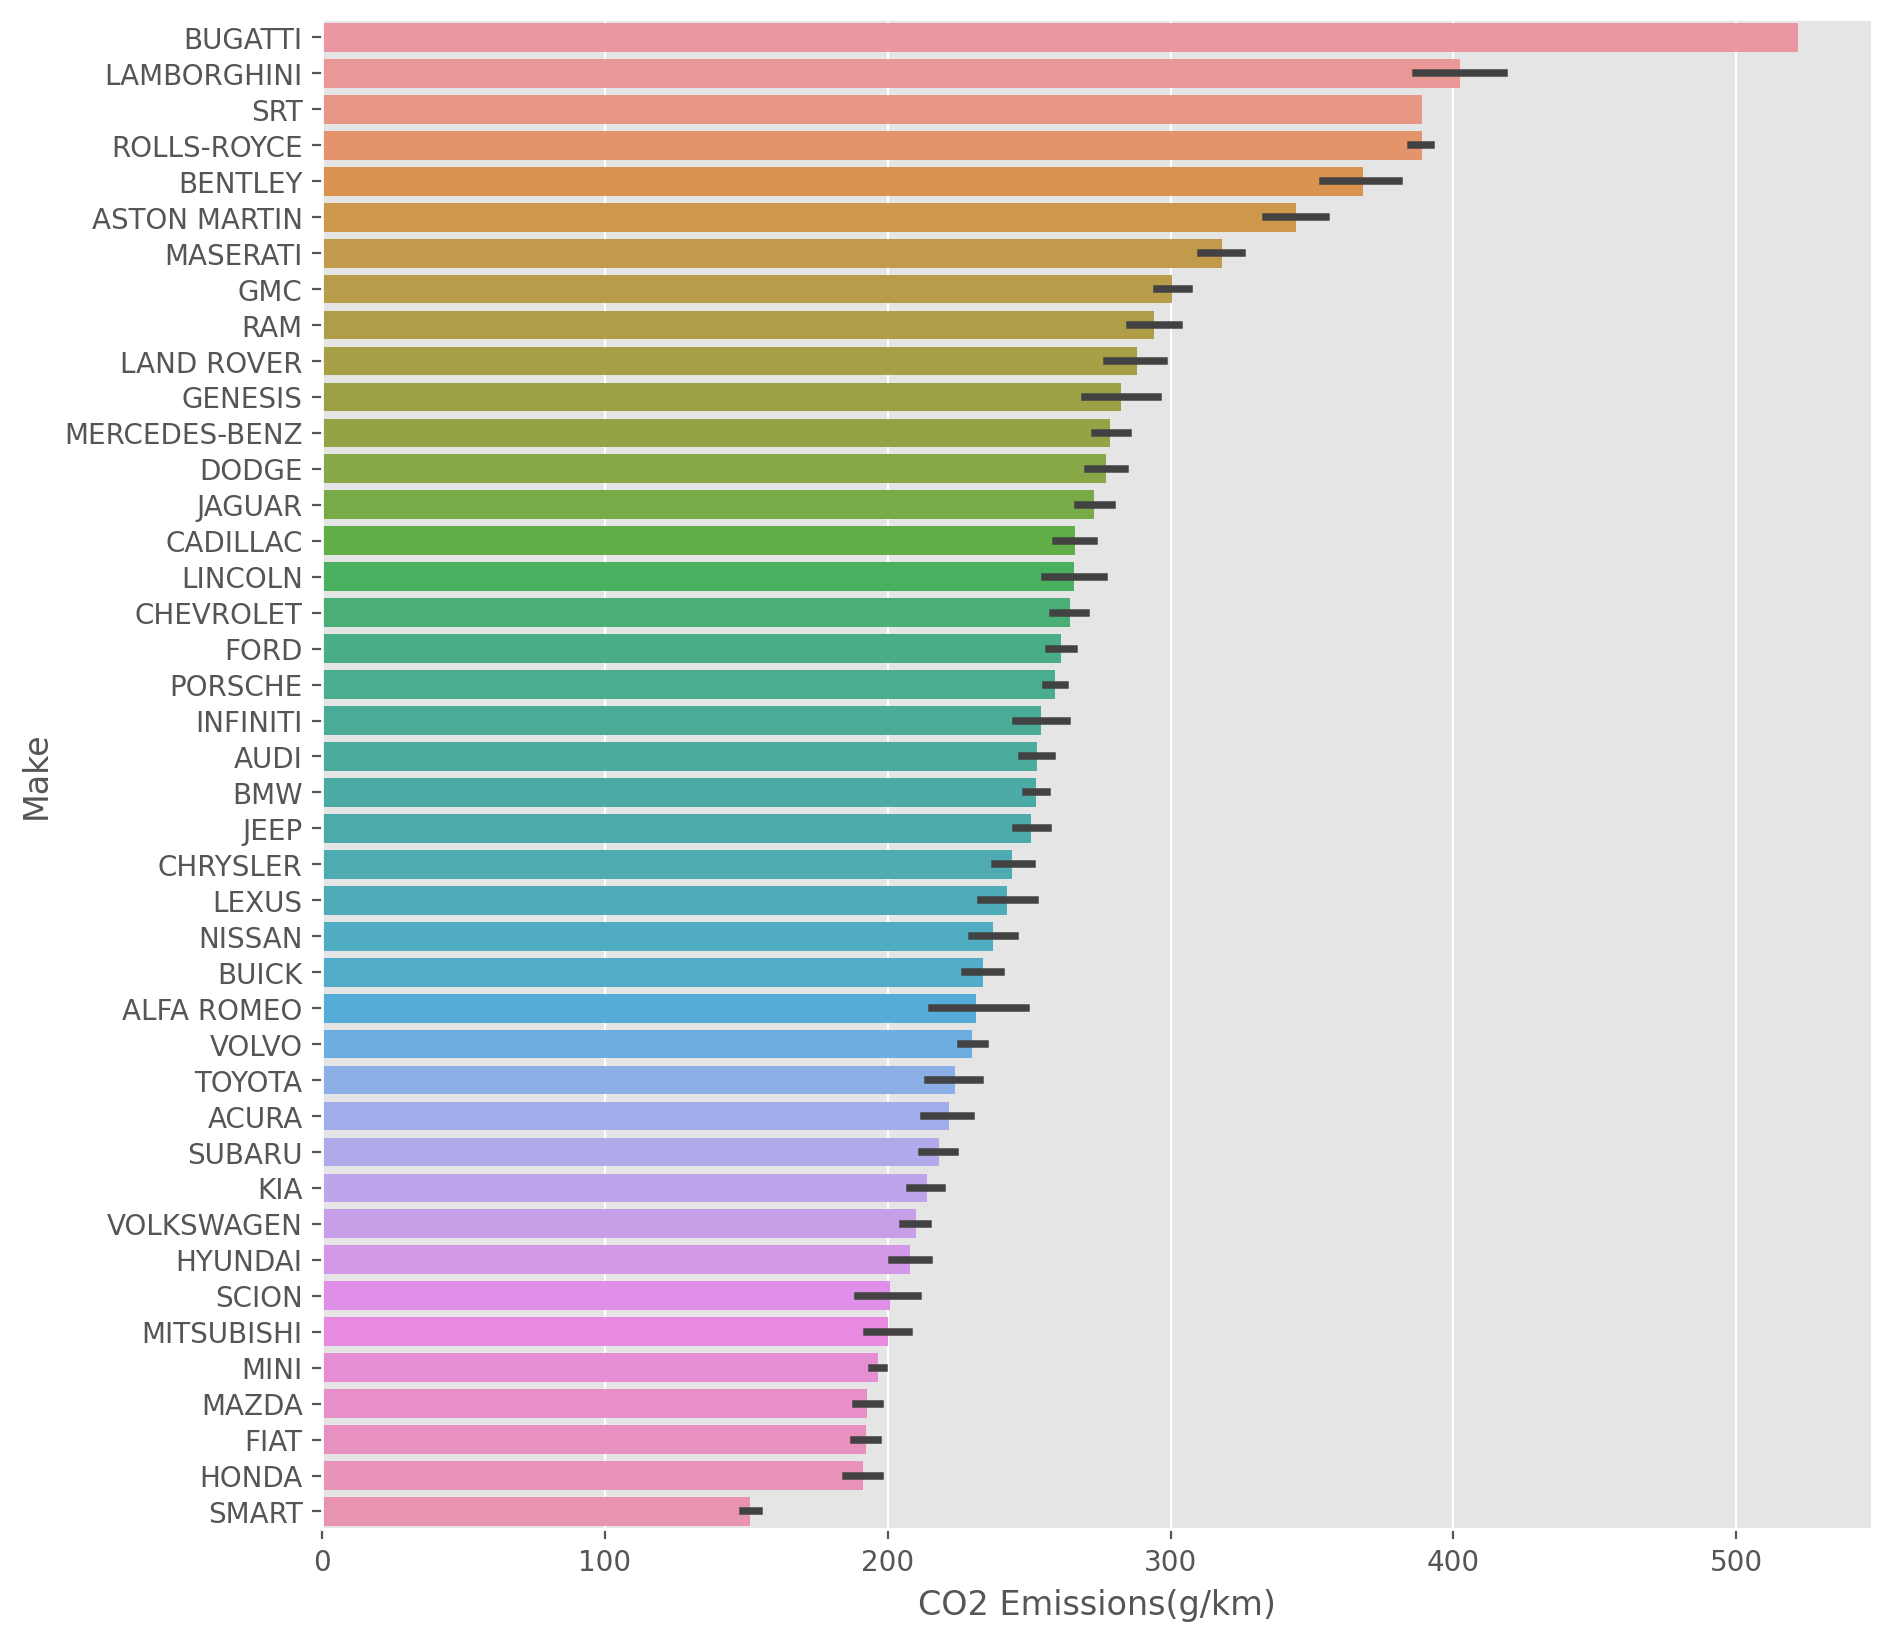

In [25]:
desc_order = data.groupby(['Make']).mean().sort_values('CO2 Emissions(g/km)', ascending = False).index
plt.figure(figsize = (10,10), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Make', data = data, order = desc_order)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Make'>

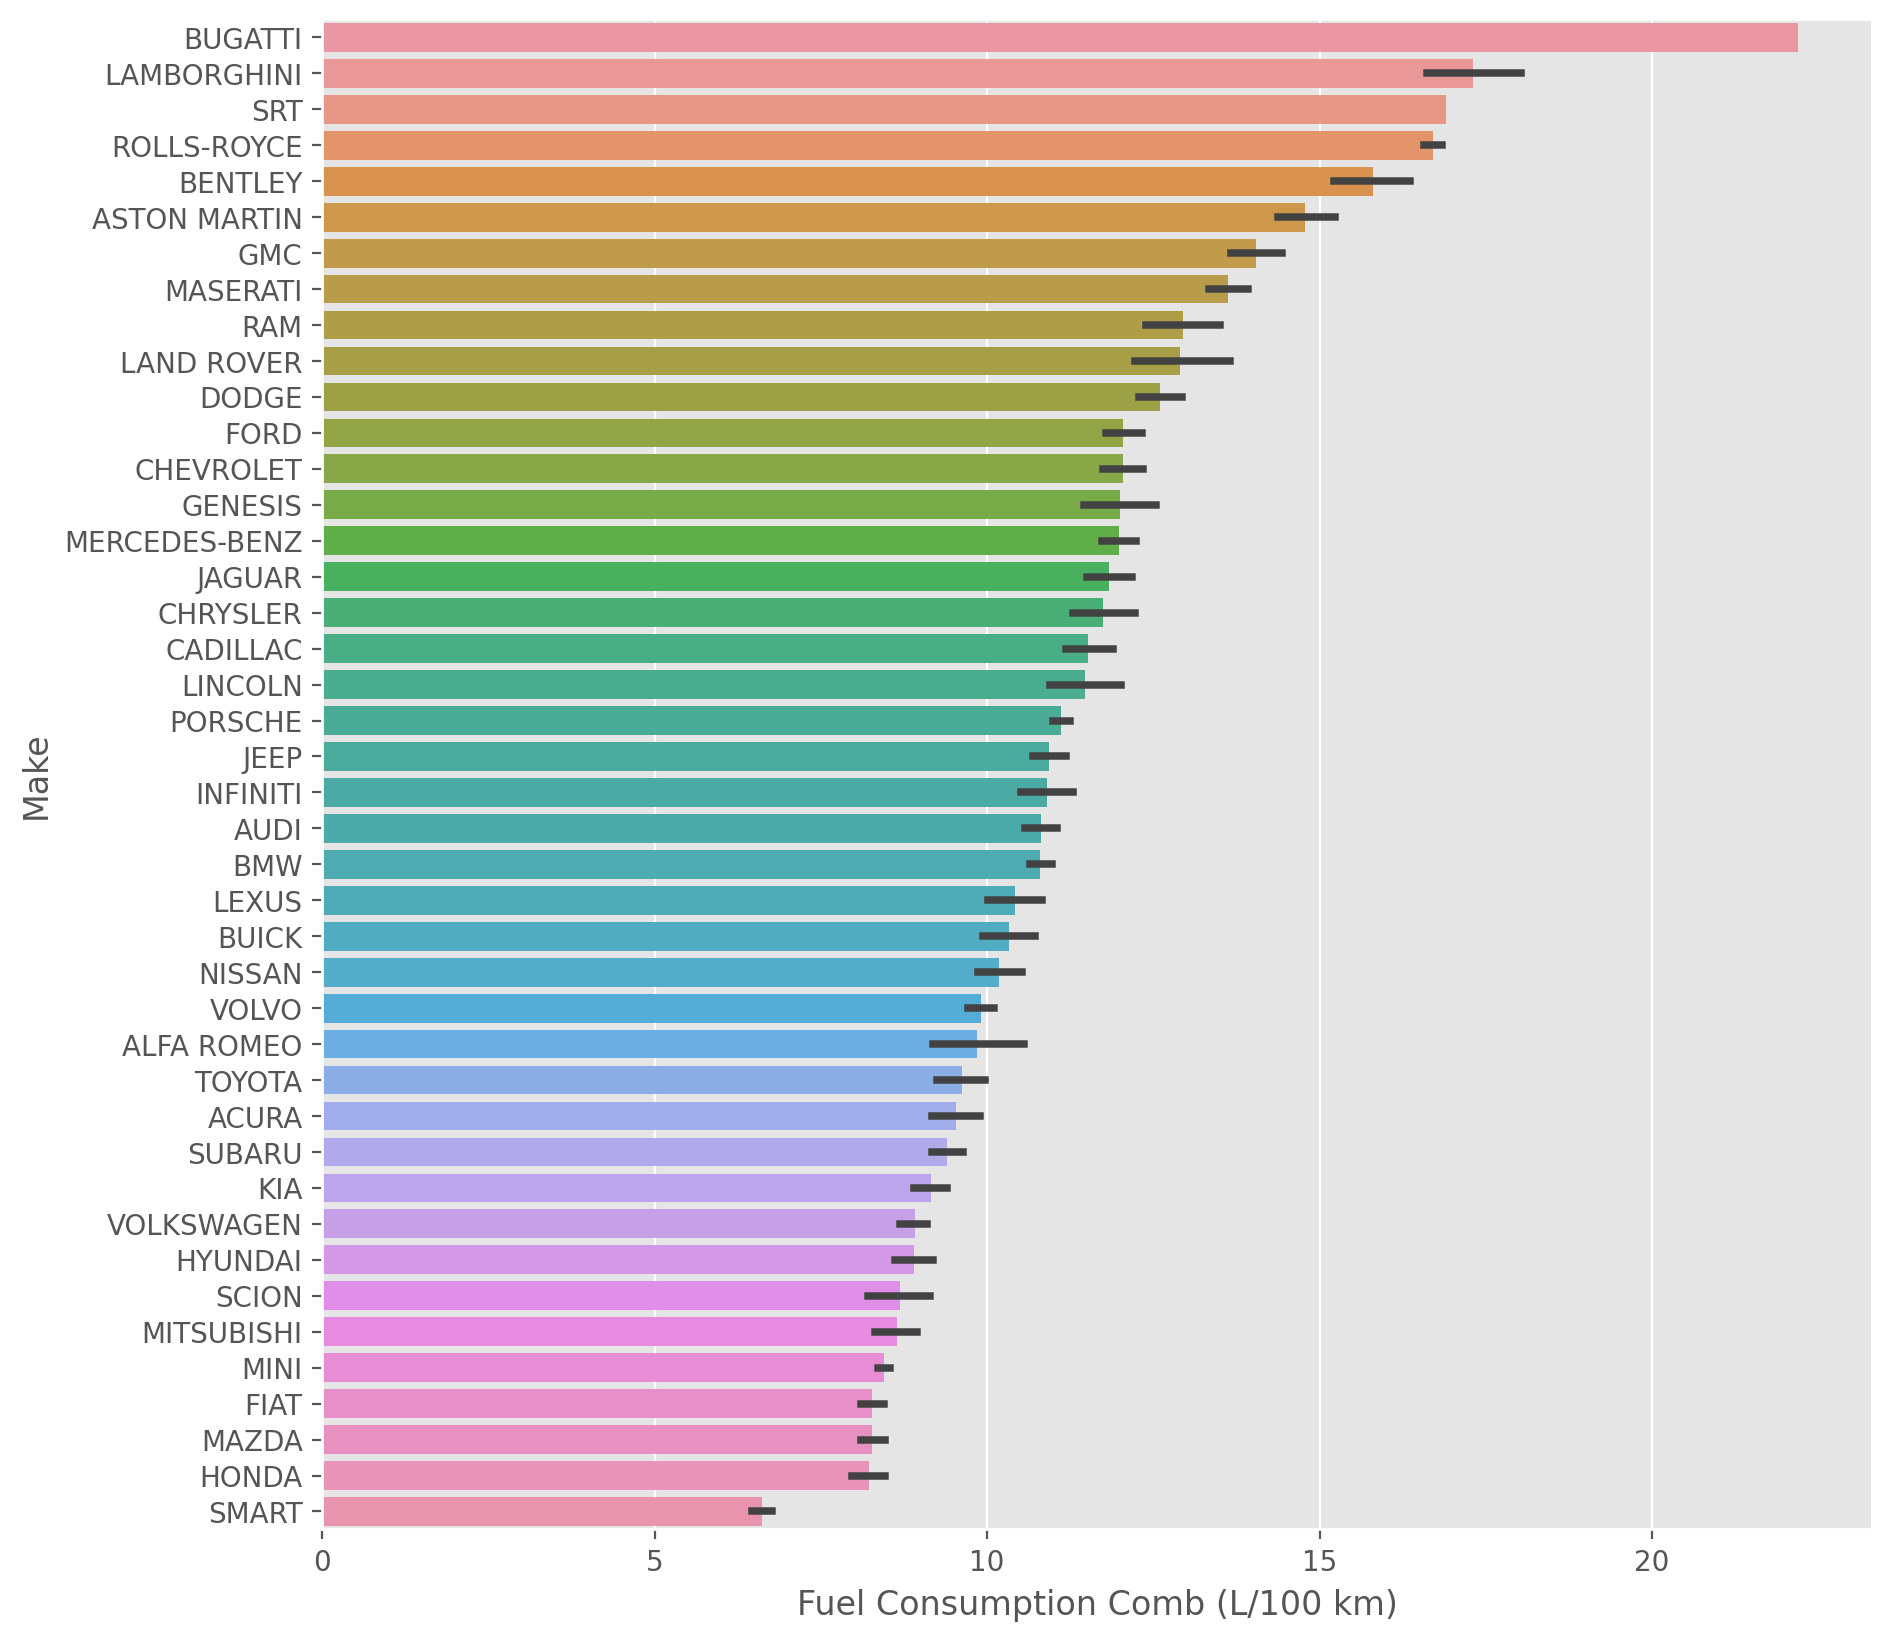

In [26]:
desc_order = data.groupby(['Make']).mean().sort_values('Fuel Consumption Comb (L/100 km)', ascending = False).index
plt.figure(figsize = (10,10), dpi = 200)
sns.barplot('Fuel Consumption Comb (L/100 km)', 'Make', data = data, order = desc_order)

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Make'>

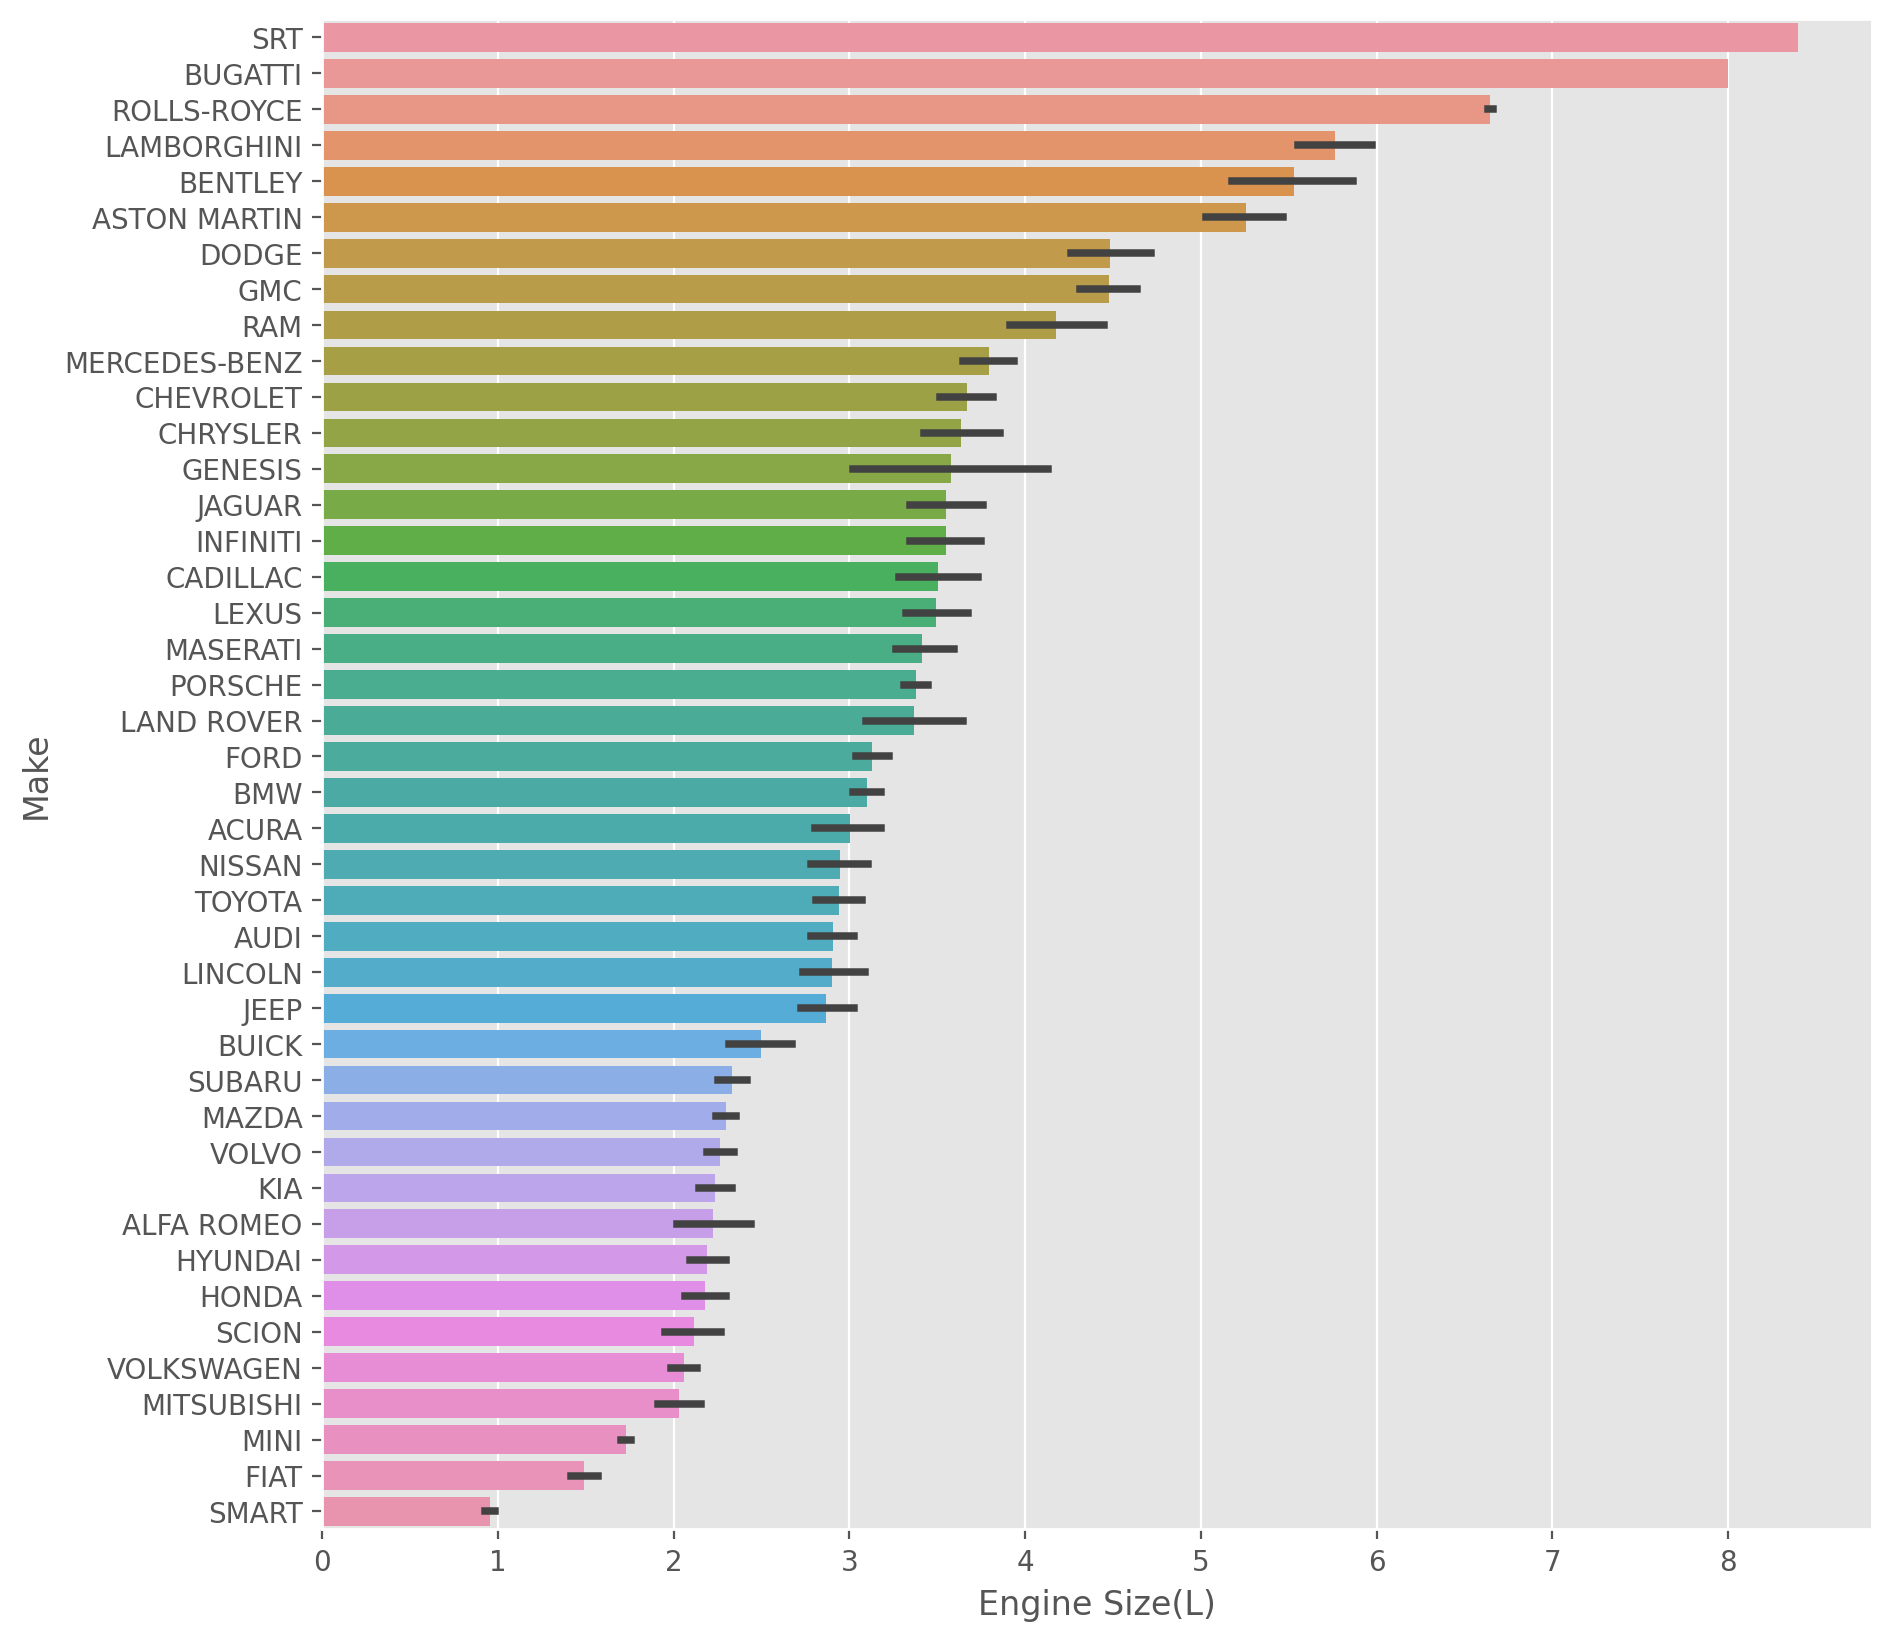

In [27]:
desc_order = data.groupby(['Make']).mean().sort_values('Engine Size(L)', ascending = False).index
plt.figure(figsize = (10,10), dpi = 200)
sns.barplot('Engine Size(L)', 'Make', data = data, order = desc_order)

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

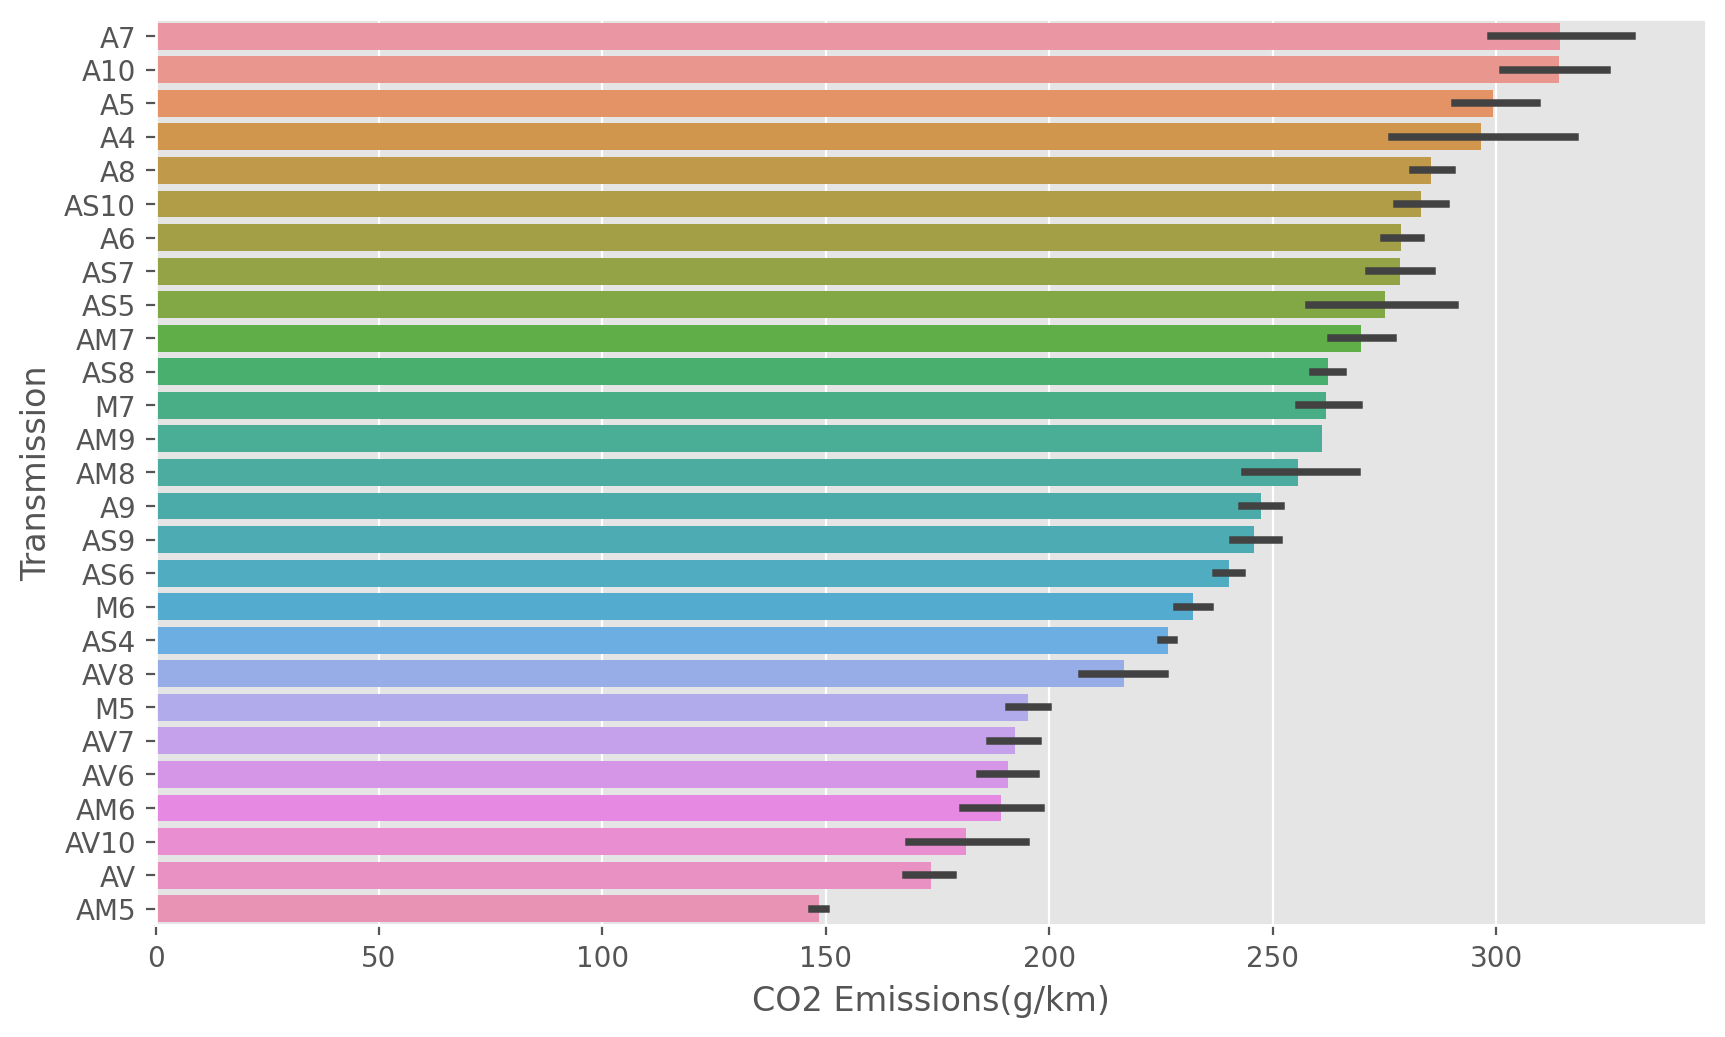

In [28]:
desc_order = data.groupby(['Transmission']).mean().sort_values('CO2 Emissions(g/km)', ascending = False).index
plt.figure(figsize = (10,6), dpi = 200)
sns.barplot('CO2 Emissions(g/km)', 'Transmission', data = data, order = desc_order)

<AxesSubplot:xlabel='Cylinders', ylabel='Engine Size(L)'>

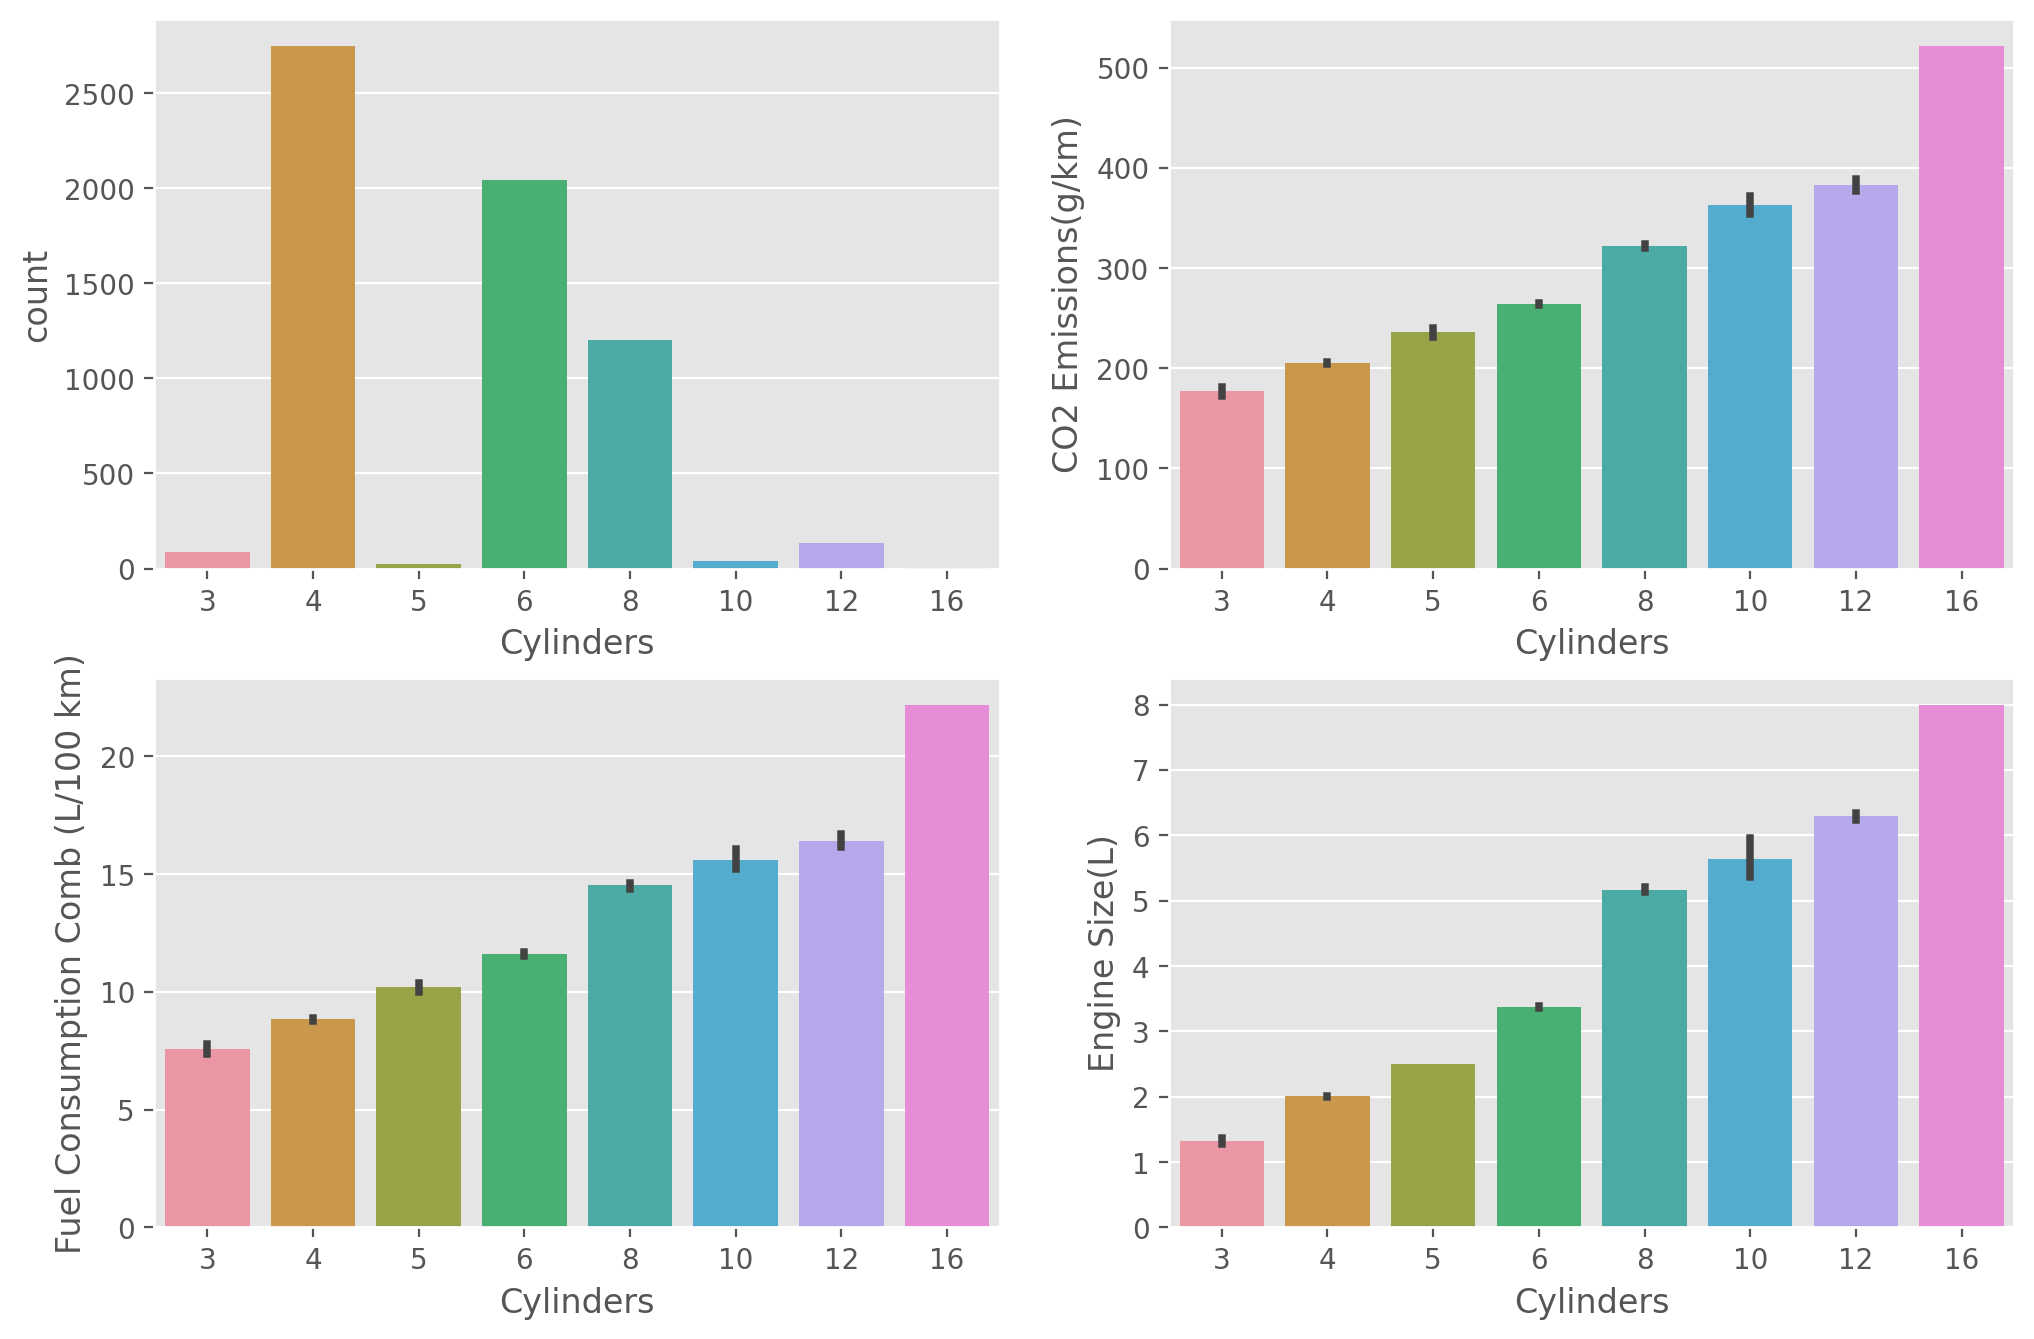

In [29]:
plt.figure(figsize = (12,8), dpi = 200)

plt.subplot(2,2,1)
sns.countplot('Cylinders', data = data)

plt.subplot(2,2,2)
sns.barplot('Cylinders','CO2 Emissions(g/km)', data = data)

plt.subplot(2,2,3)
sns.barplot('Cylinders','Fuel Consumption Comb (L/100 km)', data = data)

plt.subplot(2,2,4)
sns.barplot('Cylinders','Engine Size(L)', data = data)

## Checking Correlation

<AxesSubplot:>

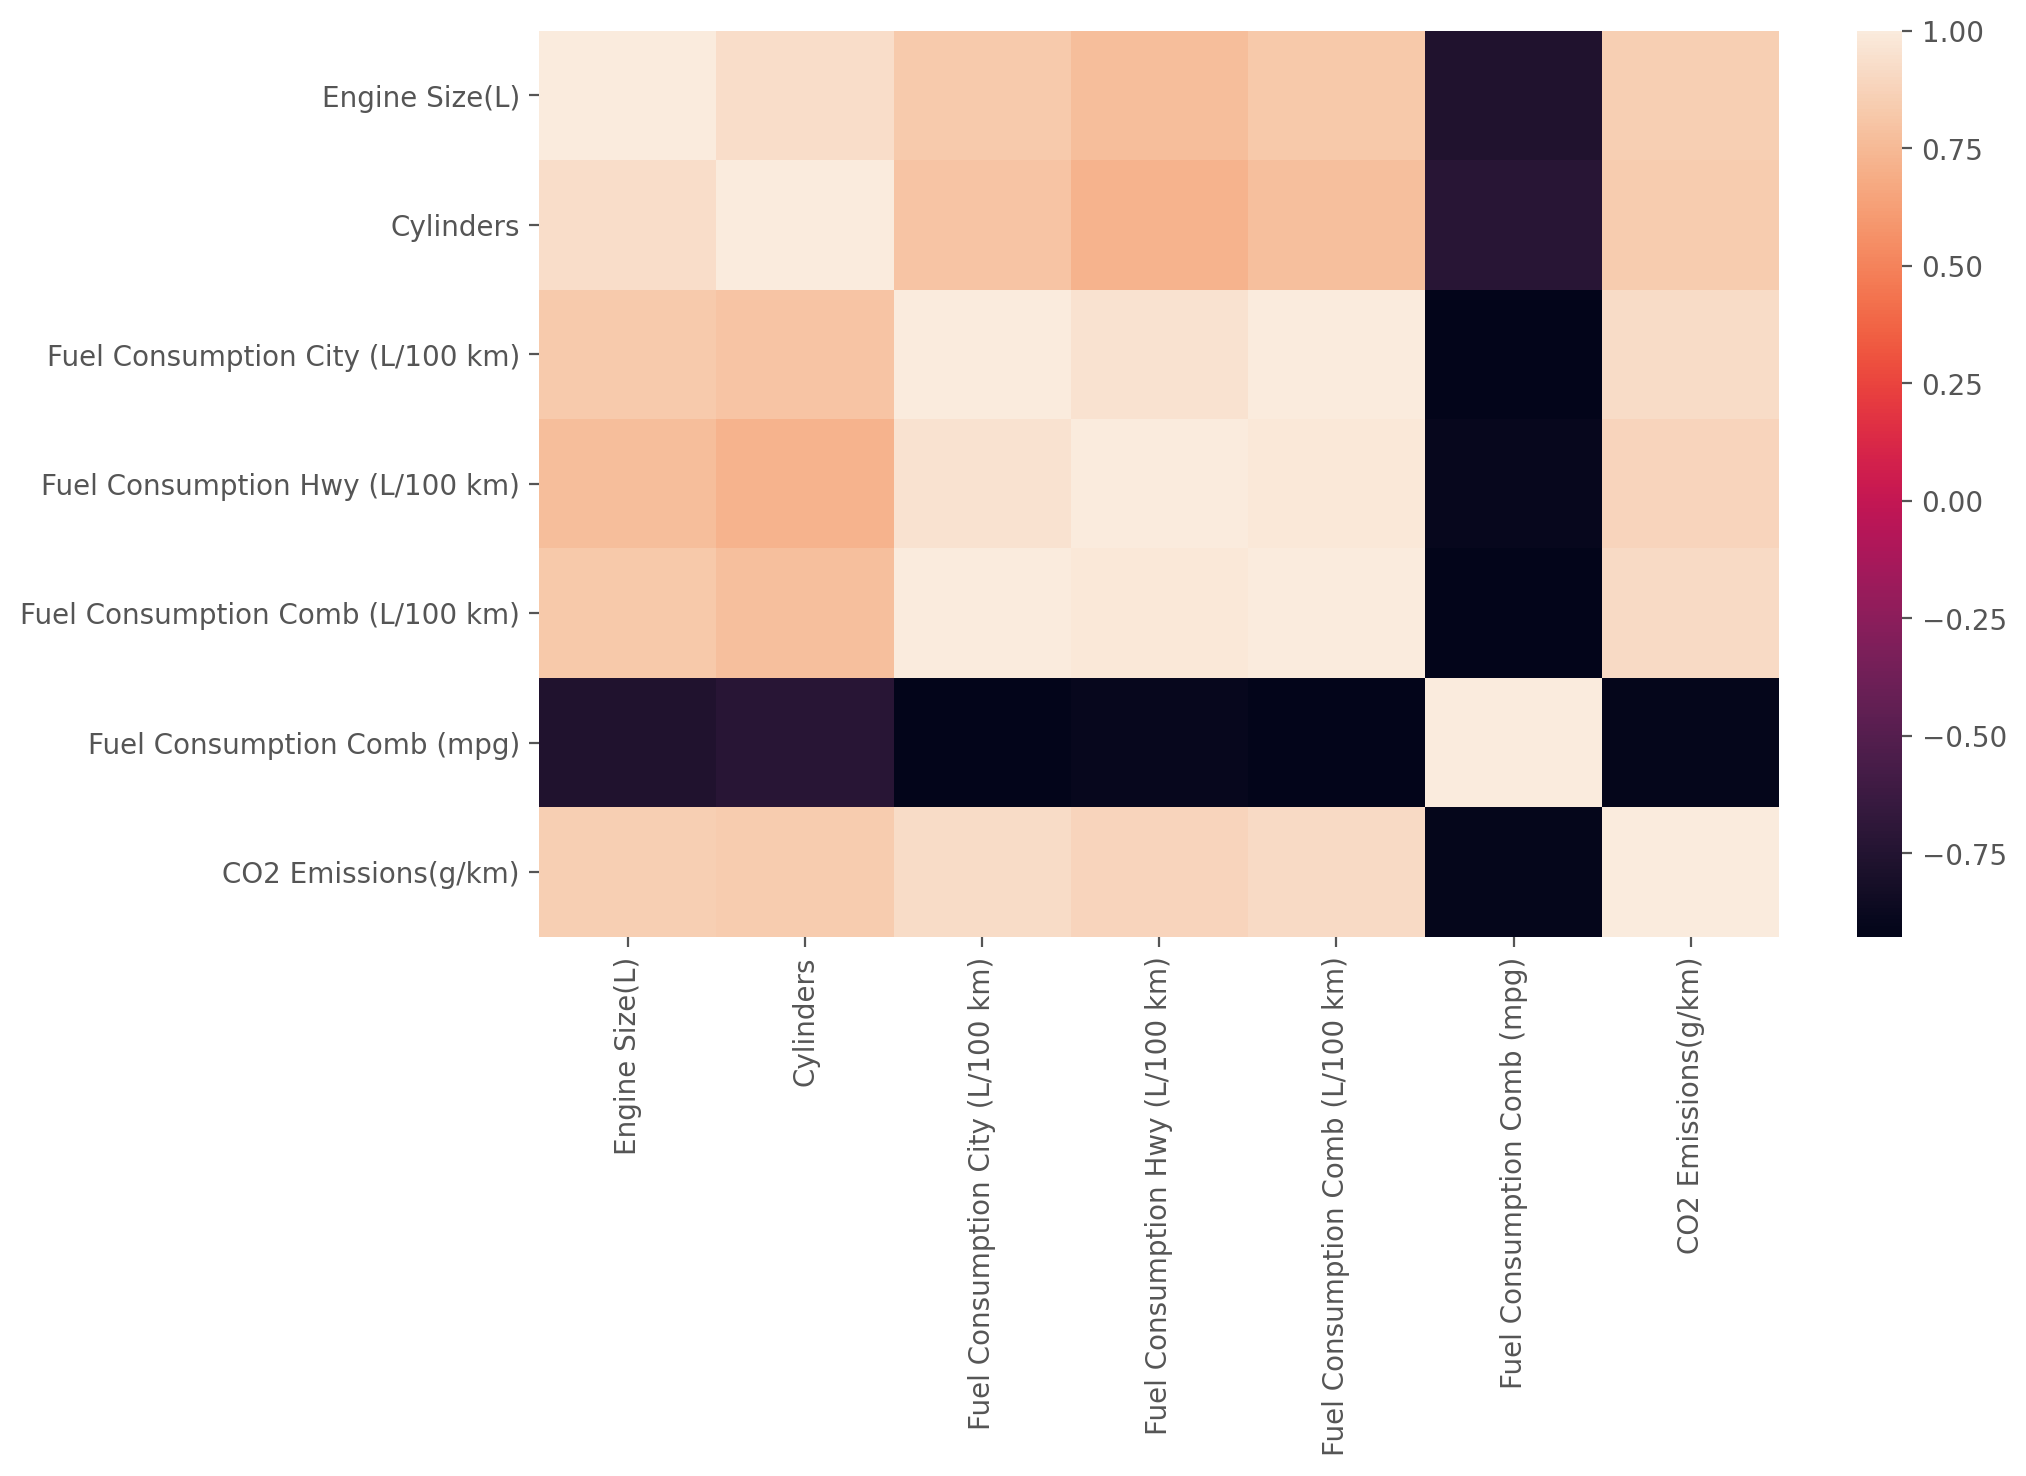

In [30]:
plt.figure(figsize = (10,6), dpi = 200)
sns.heatmap(data.corr())

## Selecting Features

In [31]:
cols = ['Vehicle Class', 'Transmission', 'Fuel Type','Cylinders', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
X = data[cols]
Y = data[['CO2 Emissions(g/km)']]
X.head()

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,AS5,Z,4,2.0,8.5
1,COMPACT,M6,Z,4,2.4,9.6
2,COMPACT,AV7,Z,4,1.5,5.9
3,SUV - SMALL,AS6,Z,6,3.5,11.1
4,SUV - SMALL,AS6,Z,6,3.5,10.6


In [32]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
cols = ['Vehicle Class', 'Transmission', 'Fuel Type']
X[cols] = encoder.fit_transform(X[cols])

In [33]:
X.head()

,Vehicle Class,Transmission,Fuel Type,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,0.0,14.0,4.0,4,2.0,8.5
1,0.0,25.0,4.0,4,2.4,9.6
2,0.0,22.0,4.0,4,1.5,5.9
3,11.0,15.0,4.0,6,3.5,11.1
4,11.0,15.0,4.0,6,3.5,10.6


In [34]:
print('Independent features Shape : ', X.shape)
print('Dependent features Shape   : ', Y.shape)

Independent features Shape :  (6282, 6)
Dependent features Shape   :  (6282, 1)


## Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

In [36]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (4711, 6)
Training Labels Shape :  (4711, 1)
Testing Data Shape    :  (1571, 6)
Testing Labels Shape  :  (1571, 1)


# Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 4)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [53]:
print('Training Set Score : ', reg.score(x_train, y_train))
print('Testing Set Score  : ', reg.score(x_test, y_test))

Training Set Score :  0.9577042541356906
Testing Set Score  :  0.9510941216537547


In [54]:
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

In [55]:
df = pd.DataFrame()
df['Actual_Values'] = y_test.values.ravel()
df['Predicted_Values'] = pred_test
df.head(20)

,Actual_Values,Predicted_Values
0,232,228.929185
1,196,199.677419
2,242,242.813514
3,432,409.259542
4,205,199.677419
5,199,199.677419
6,153,165.045000
7,224,228.929185
8,301,300.734252
9,239,242.813514


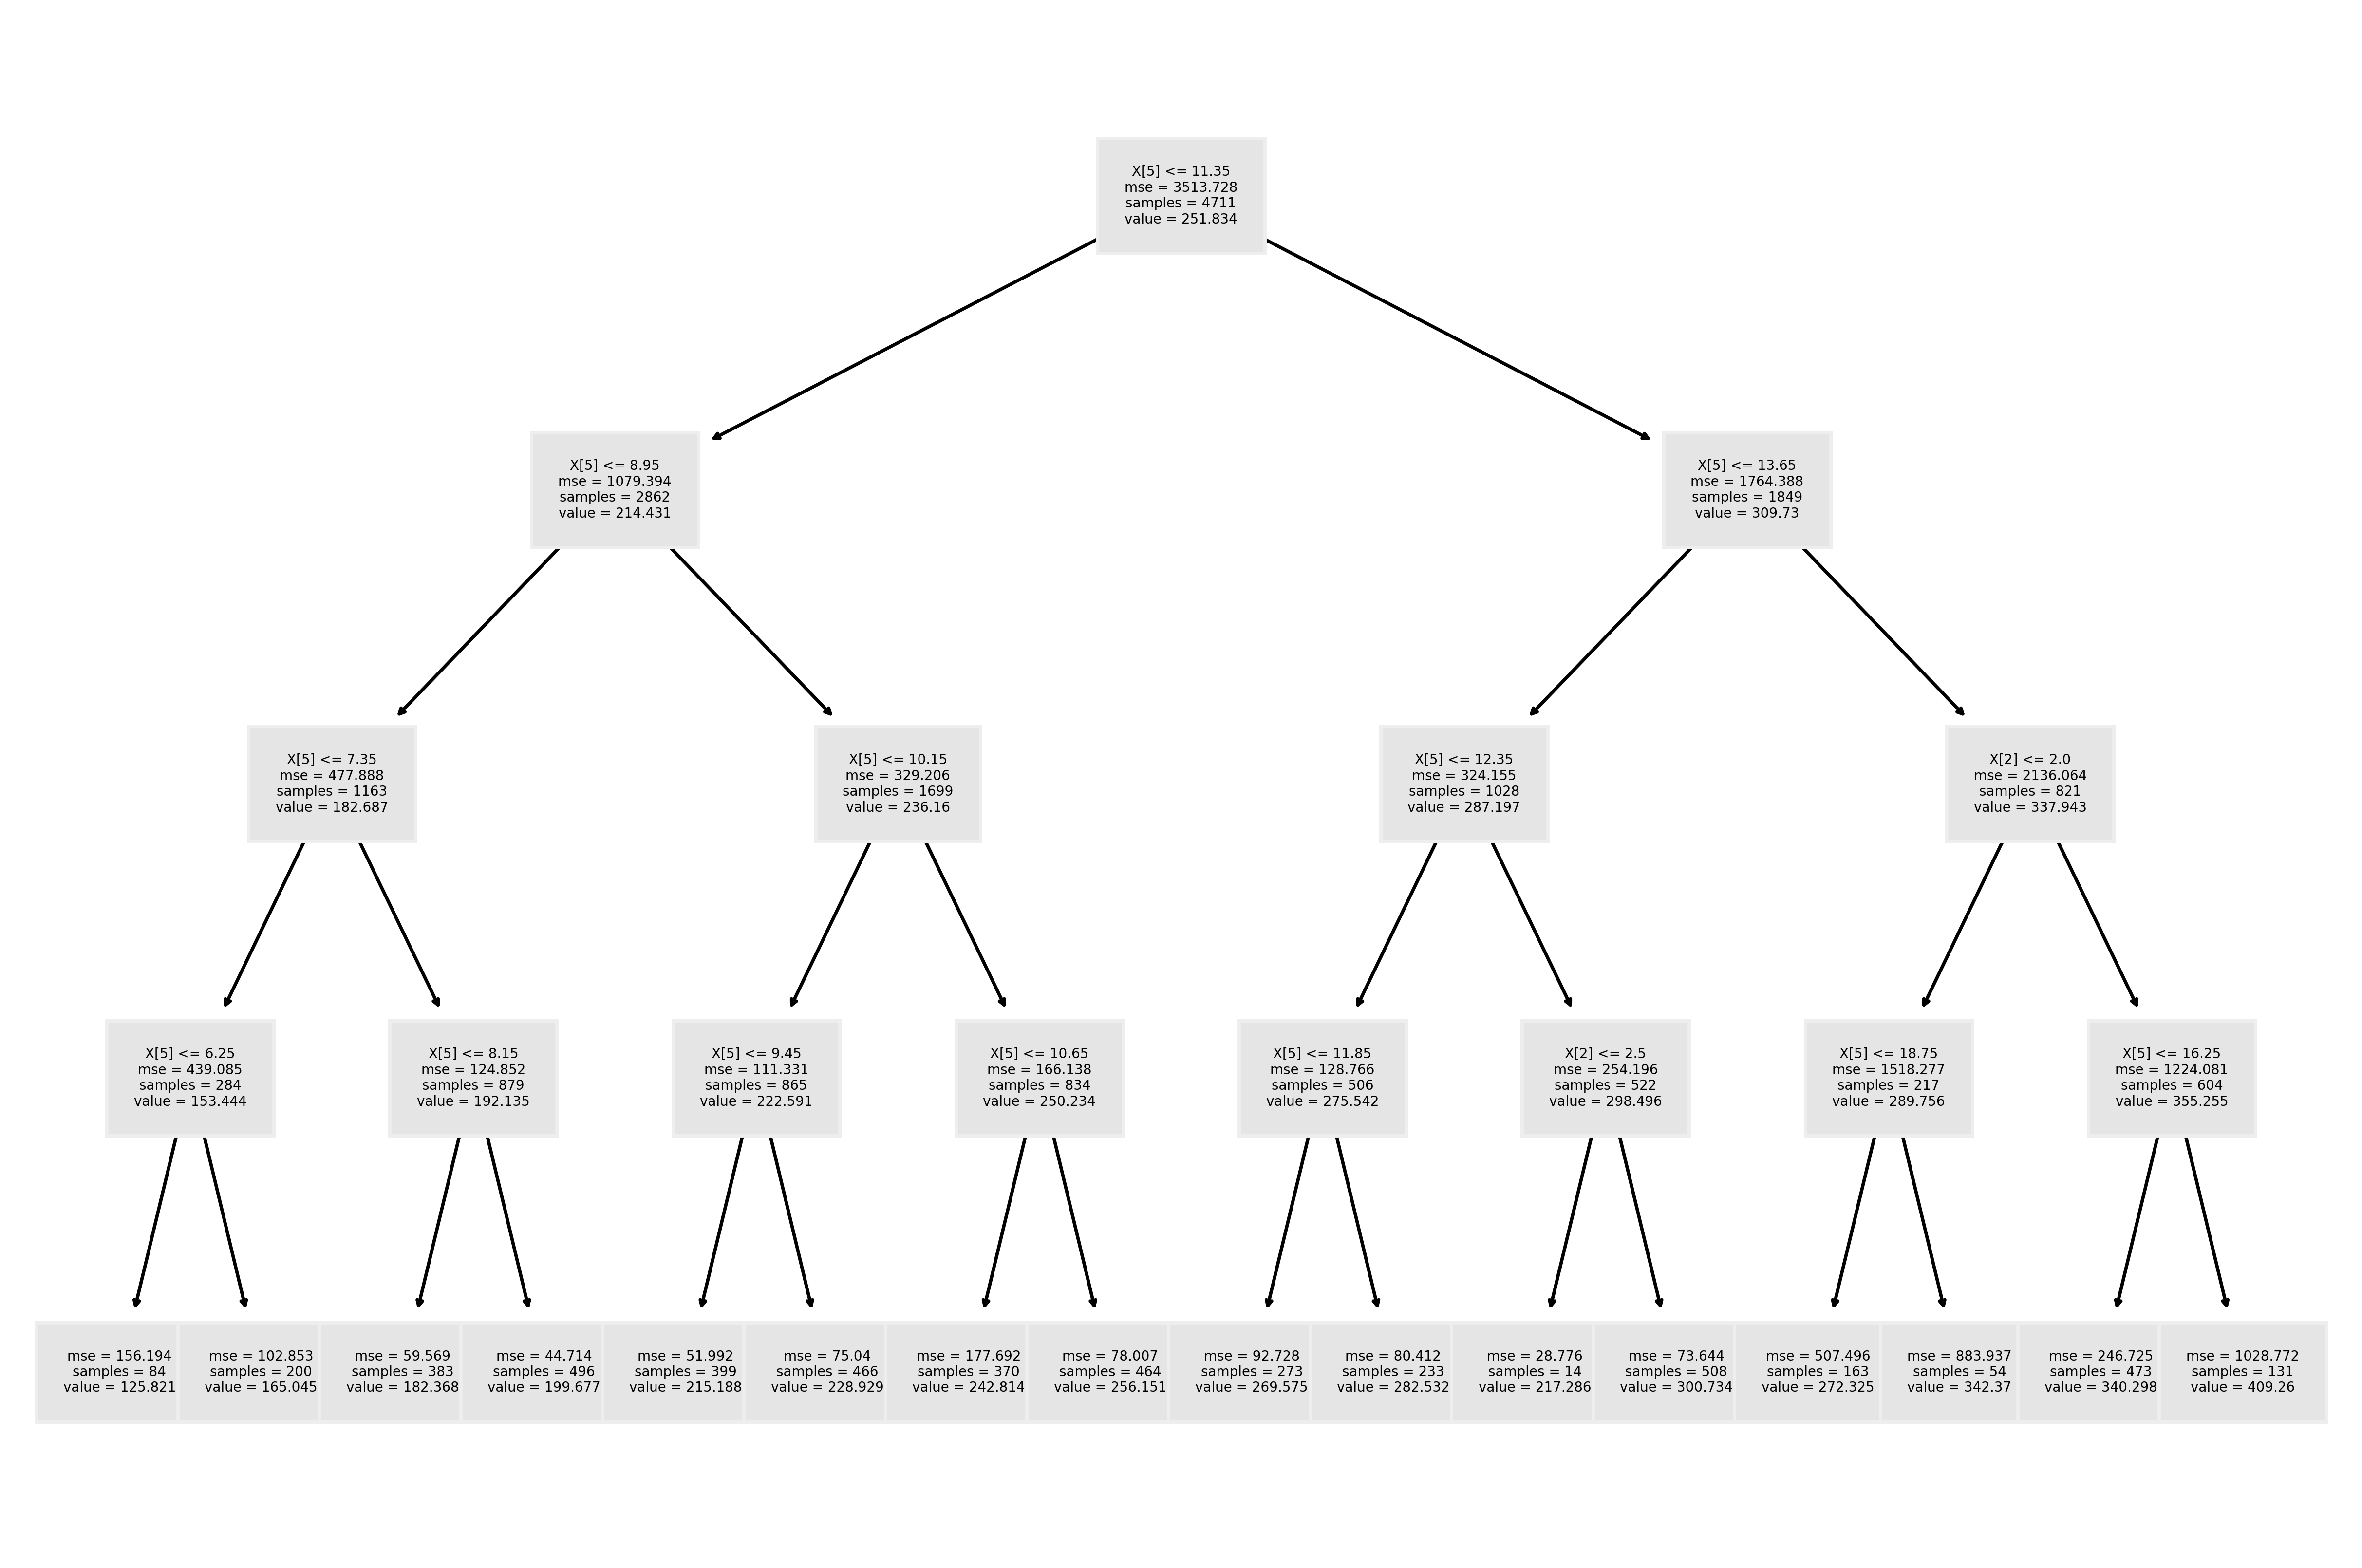

In [57]:
from sklearn import tree
plt.figure(dpi = 1000)
tree.plot_tree(reg, fontsize = 2)
plt.show()

In [59]:
y_train.mean()

CO2 Emissions(g/km)    251.834218
dtype: float64